In [1]:
import pandas as pd
df = pd.read_csv('c:/data/dacon/card.csv')

In [2]:
sj = df[df['selng_cascnt']=='석재'].index
ct = df[df['selng_cascnt']=='커텐'].index
ys = df[df['selng_cascnt']=='영상물'].index
bj = df[df['selng_cascnt']=='복지매장'].index
ch = df[df['selng_cascnt']=='축협직영매장'].index

df_mod1 = df.drop(sj)
df_mod2 = df_mod1.drop(ct)
df_mod3 = df_mod2.drop(ys)
df_mod4 = df_mod3.drop(bj)
df_mod5 = df_mod4.drop(ch)

In [3]:
df_mod5['selng_cascnt_int'] = pd.to_numeric(df_mod5['selng_cascnt'])
df_mod5['receipt_dttm'] = df_mod5['receipt_dttm'].astype(str)
df_mod5['date']=df_mod5['receipt_dttm'].str[0:4]+"-"+df_mod5["receipt_dttm"].str[4:6]+"-"+df_mod5["receipt_dttm"].str[6:8]
df_mod5['date']=df_mod5['date'].astype('datetime64[ns]')

# 세부카테고리별 매출 건수 비교

## 의류(42__)

- 상향: 정장, 내의, 기타의류, 스포츠의류(가파름), 양품점, 와이셔츠, 캐쥬얼
- 하향: 단체복, 맞춤복
- 유지: 없음.

In [ ]:
df_cloth = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 42]
plt.figure(figsize=(30,10))
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='기타의류'].groupby('date').selng_cascnt_int.sum(), label='기타의류')
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='내의판매점'].groupby('date').selng_cascnt_int.sum(), label='내의판매점')
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='단체복'].groupby('date').selng_cascnt_int.sum(), label='단체복')
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='맞춤복 점'].groupby('date').selng_cascnt_int.sum(), label='맞춤복 점')
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='스포츠의류'].groupby('date').selng_cascnt_int.sum(), label='스포츠의류')
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='양 품 점'].groupby('date').selng_cascnt_int.sum(), label='양 품 점')
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='와이셔츠/타이'].groupby('date').selng_cascnt_int.sum(), label='와이셔츠/타이')
# plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='정장'].groupby('date').selng_cascnt_int.sum(), label='정장')
plt.plot(df_cloth[df_cloth['mrhst_induty_cl_nm']=='캐쥬얼의류'].groupby('date').selng_cascnt_int.sum(), label='캐쥬얼의류')
plt.legend(loc = 'upper left')
plt.show()

## 숙박(10__)

- 상향: 
- 하향: 특급호텔, 콘도
- 유지: 기타숙박, 1급호텔, 2급호텔

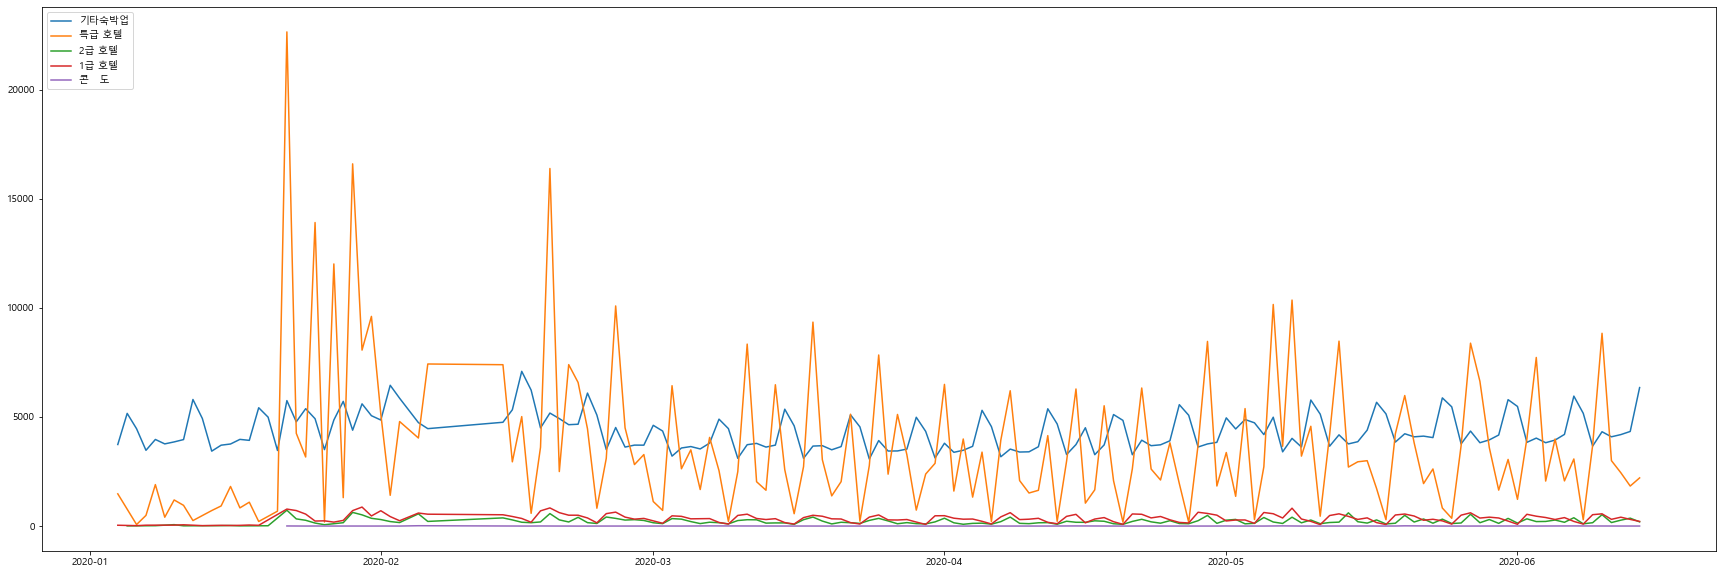

In [9]:
df_sleep = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 10]
plt.figure(figsize=(30,10))
plt.plot(df_sleep[df_sleep['mrhst_induty_cl_nm']=='기타숙박업'].groupby('date').selng_cascnt_int.sum(), label='기타숙박업')
plt.plot(df_sleep[df_sleep['mrhst_induty_cl_nm']=='특급 호텔'].groupby('date').selng_cascnt_int.sum(), label='특급 호텔')
plt.plot(df_sleep[df_sleep['mrhst_induty_cl_nm']=='2급 호텔'].groupby('date').selng_cascnt_int.sum(), label='2급 호텔')
plt.plot(df_sleep[df_sleep['mrhst_induty_cl_nm']=='1급 호텔'].groupby('date').selng_cascnt_int.sum(), label='1급 호텔')
plt.plot(df_sleep[df_sleep['mrhst_induty_cl_nm']=='콘   도'].groupby('date').selng_cascnt_int.sum(), label='콘   도')
plt.legend(loc = 'upper left')
plt.show()

## 교통수단(11__)

- 상향: 고속버스, 철도, 여객선
- 하향: 항공사, 관광여행
- 유지: 렌트카, 택시회사, 기타교통수단

In [7]:
df_traffic = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 11]

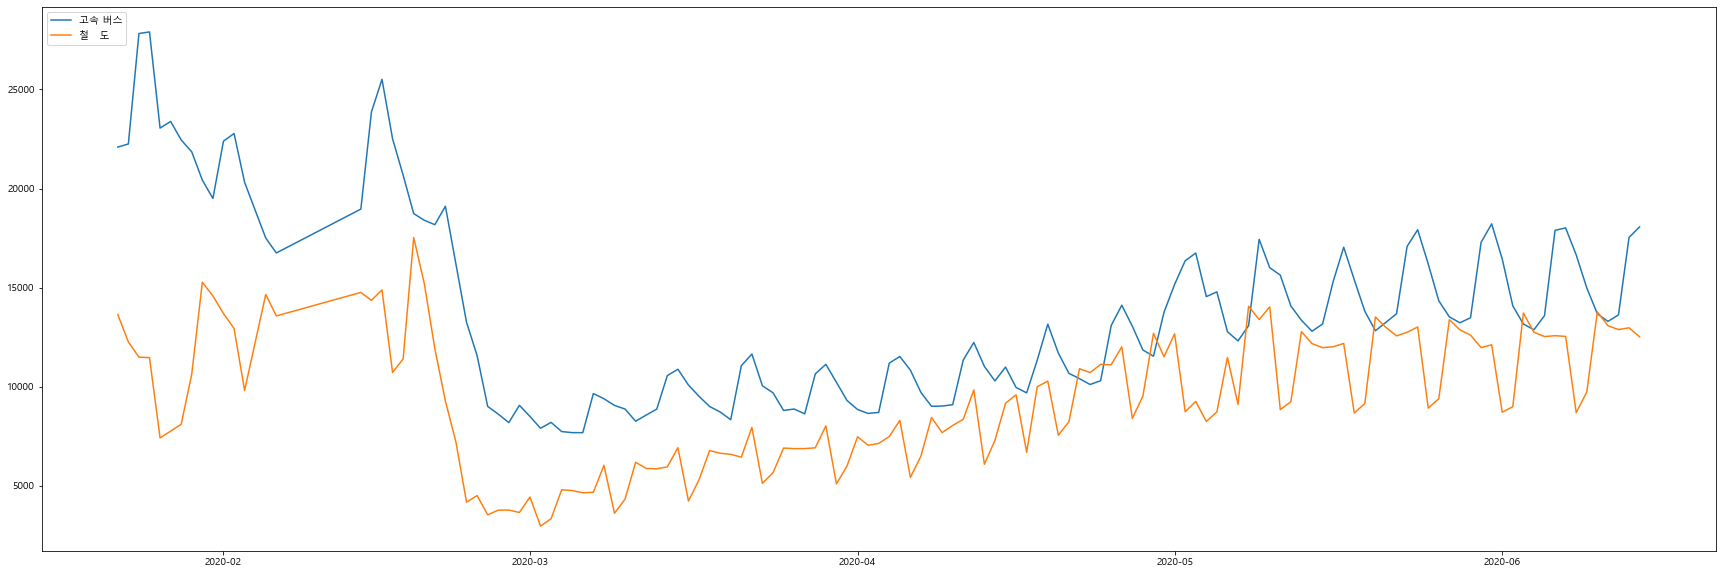

In [10]:
plt.figure(figsize=(30,10))
# plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='렌 트 카'].groupby('date').selng_cascnt_int.sum(), label='렌 트 카')
# plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='관광여행'].groupby('date').selng_cascnt_int.sum(), label='관광여행')
# plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='항 공 사'].groupby('date').selng_cascnt_int.sum(), label='항 공 사')
plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='고속 버스'].groupby('date').selng_cascnt_int.sum(), label='고속 버스')
# plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='기타교통수단'].groupby('date').selng_cascnt_int.sum(), label='기타교통수단')
# plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='여 객 선'].groupby('date').selng_cascnt_int.sum(), label='여 객 선')
plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='철   도'].groupby('date').selng_cascnt_int.sum(), label='철   도')
# plt.plot(df_traffic[df_traffic['mrhst_induty_cl_nm']=='택시회사'].groupby('date').selng_cascnt_int.sum(), label='택시회사')
plt.legend(loc = 'upper left')
plt.show()

## 레저용품(20__)

- 상향: 스포츠레져용품, 골프
- 하향:
- 유지: 악기, 피아노, 기타

In [ ]:
df_leisure = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 20]
plt.figure(figsize=(30,10))
# plt.plot(df_leisure[df_leisure['mrhst_induty_cl_nm']=='스포츠레져용품'].groupby('date').selng_cascnt_int.sum(), label='스포츠레져용품')
plt.plot(df_leisure[df_leisure['mrhst_induty_cl_nm']=='골프 용품'].groupby('date').selng_cascnt_int.sum(), label='골프 용품')
plt.plot(df_leisure[df_leisure['mrhst_induty_cl_nm']=='악 기 점'].groupby('date').selng_cascnt_int.sum(), label='악 기 점')
plt.plot(df_leisure[df_leisure['mrhst_induty_cl_nm']=='피아노대리점'].groupby('date').selng_cascnt_int.sum(), label='피아노대리점')
plt.plot(df_leisure[df_leisure['mrhst_induty_cl_nm']=='총포류판매'].groupby('date').selng_cascnt_int.sum(), label='총포류판매')
plt.legend(loc = 'upper left')
plt.show()

## 취미(21__)

- 상향: 골프경기장,골프연습장,스크린골프, 테니스장

- 하향: 기타레져업, 노래방, 헬스, 스키장, 수영장

- 유지: 당구장, 볼링장, 종합, 카지노

In [ ]:
df_play = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 21]
plt.figure(figsize=(30,10))
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='골프경기장'].groupby('date').selng_cascnt_int.sum(), label='골프경기장')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='골프연습장'].groupby('date').selng_cascnt_int.sum(), label='골프연습장')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='기타레져업'].groupby('date').selng_cascnt_int.sum(), label='기타레져업')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='노래방'].groupby('date').selng_cascnt_int.sum(), label='노래방')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='당구장'].groupby('date').selng_cascnt_int.sum(), label='당구장')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='볼 링 장'].groupby('date').selng_cascnt_int.sum(), label='볼 링 장')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='수 영 장'].groupby('date').selng_cascnt_int.sum(), label='수 영 장')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='스 키 장'].groupby('date').selng_cascnt_int.sum(), label='스 키 장')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='스크린골프'].groupby('date').selng_cascnt_int.sum(), label='스크린골프')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='종합레져타운'].groupby('date').selng_cascnt_int.sum(), label='종합레져타운')
plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='카지노'].groupby('date').selng_cascnt_int.sum(), label='카지노')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='테니스 장'].groupby('date').selng_cascnt_int.sum(), label='테니스 장')
# plt.plot(df_play[df_play['mrhst_induty_cl_nm']=='헬스 크럽'].groupby('date').selng_cascnt_int.sum(), label='헬스 크럽')
plt.legend(loc = 'upper left')
plt.show()

## 문화(22__)

- 상향: 화원, 수족관, 화방표구점, 민예공예품, 화랑

- 하향: 영화관, 티켓, 문화취미기타

- 유지: 애완동물, 골동품점

In [ ]:
df_culture = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 22]
plt.figure(figsize=(30,10))
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='골동품 점'].groupby('date').selng_cascnt_int.sum(), label='골동품 점')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='문화취미기타'].groupby('date').selng_cascnt_int.sum(), label='문화취미기타')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='민예공예품'].groupby('date').selng_cascnt_int.sum(), label='민예공예품')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='수 족 관'].groupby('date').selng_cascnt_int.sum(), label='수 족 관')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='애완 동물'].groupby('date').selng_cascnt_int.sum(), label='애완 동물')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='영화관'].groupby('date').selng_cascnt_int.sum(), label='영화관')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='티켓'].groupby('date').selng_cascnt_int.sum(), label='티켓')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='화   랑'].groupby('date').selng_cascnt_int.sum(), label='화   랑')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='화   원'].groupby('date').selng_cascnt_int.sum(), label='화   원')
plt.plot(df_culture[df_culture['mrhst_induty_cl_nm']=='화방표구점'].groupby('date').selng_cascnt_int.sum(), label='화방표구점')
plt.legend(loc = 'upper left')
plt.show()

## 가구(30__)

In [4]:
df_fur = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 30]
set(df_fur['mrhst_induty_cl_nm'].values)

{'기타가구', '일반 가구', '철제 가구'}

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)

C:\Users\analysis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


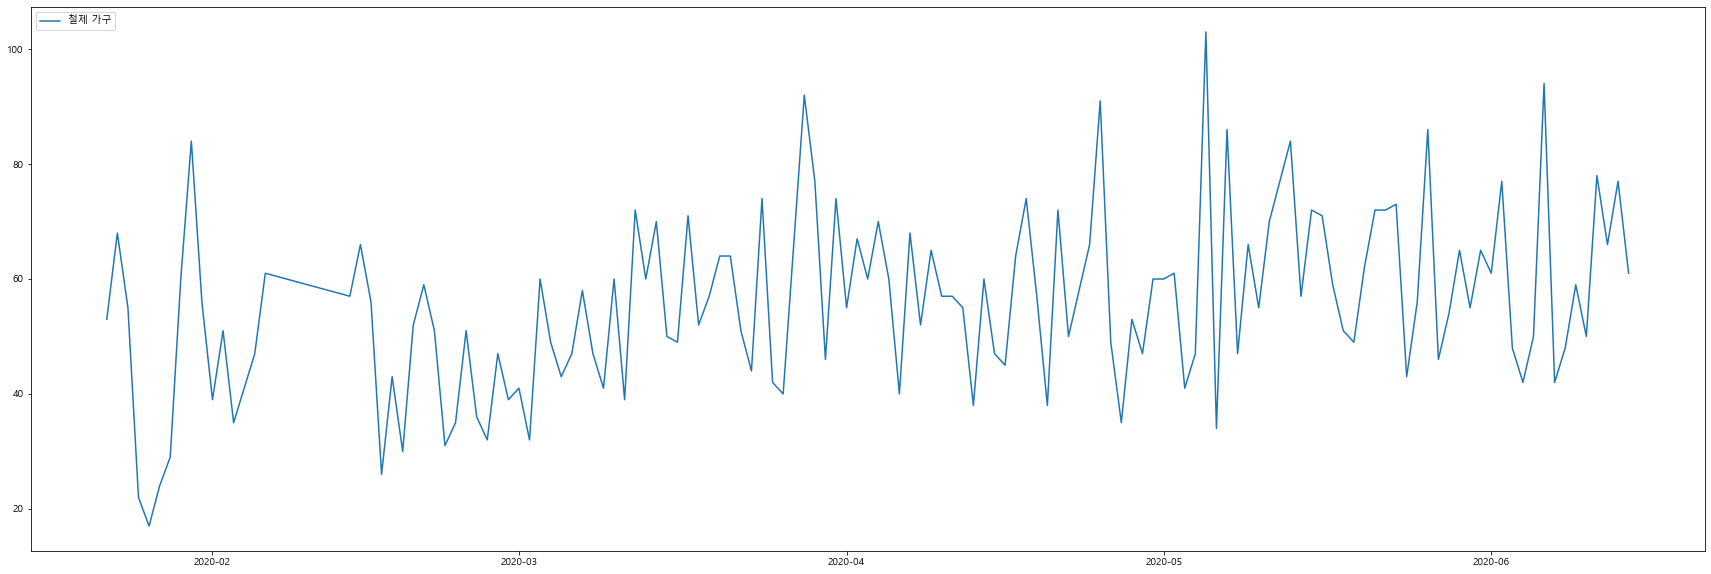

In [6]:
plt.figure(figsize=(30,10))
# plt.plot(df_fur[df_fur['mrhst_induty_cl_nm']=='기타가구'].groupby('date').selng_cascnt_int.sum(), label='기타가구')
# plt.plot(df_fur[df_fur['mrhst_induty_cl_nm']=='일반 가구'].groupby('date').selng_cascnt_int.sum(), label='일반 가구')
plt.plot(df_fur[df_fur['mrhst_induty_cl_nm']=='철제 가구'].groupby('date').selng_cascnt_int.sum(), label='철제 가구')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 일반 가구, 철제 가구

- 하향: 기타가구

- 유지: 

# 가전(31__)

In [8]:
df_tv = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 31]
set(df_tv['mrhst_induty_cl_nm'].values)

{'가전 제품', '기타전기제품', '냉열 기기'}

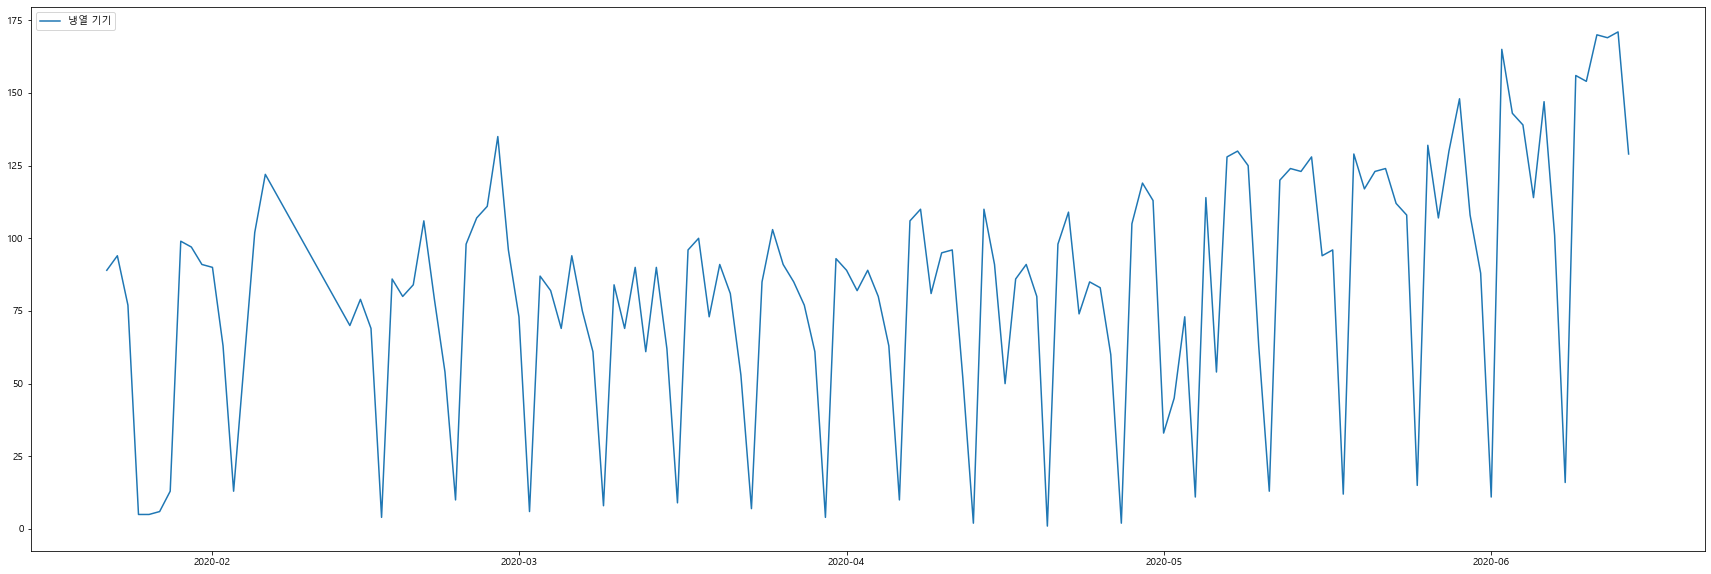

In [11]:
plt.figure(figsize=(30,10))
# plt.plot(df_tv[df_tv['mrhst_induty_cl_nm']=='가전 제품'].groupby('date').selng_cascnt_int.sum(), label='가전 제품')
# plt.plot(df_tv[df_tv['mrhst_induty_cl_nm']=='기타전기제품'].groupby('date').selng_cascnt_int.sum(), label='기타전기제품')
plt.plot(df_tv[df_tv['mrhst_induty_cl_nm']=='냉열 기기'].groupby('date').selng_cascnt_int.sum(), label='냉열 기기')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 냉열기기

- 하향:

- 유지: 가전제품, 기타전기제품

# 주방용품(32__)

In [12]:
df_kit = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 32]
set(df_kit['mrhst_induty_cl_nm'].values)

{'기타주방용구', '정 수 기', '주방 용구', '주방용식기'}

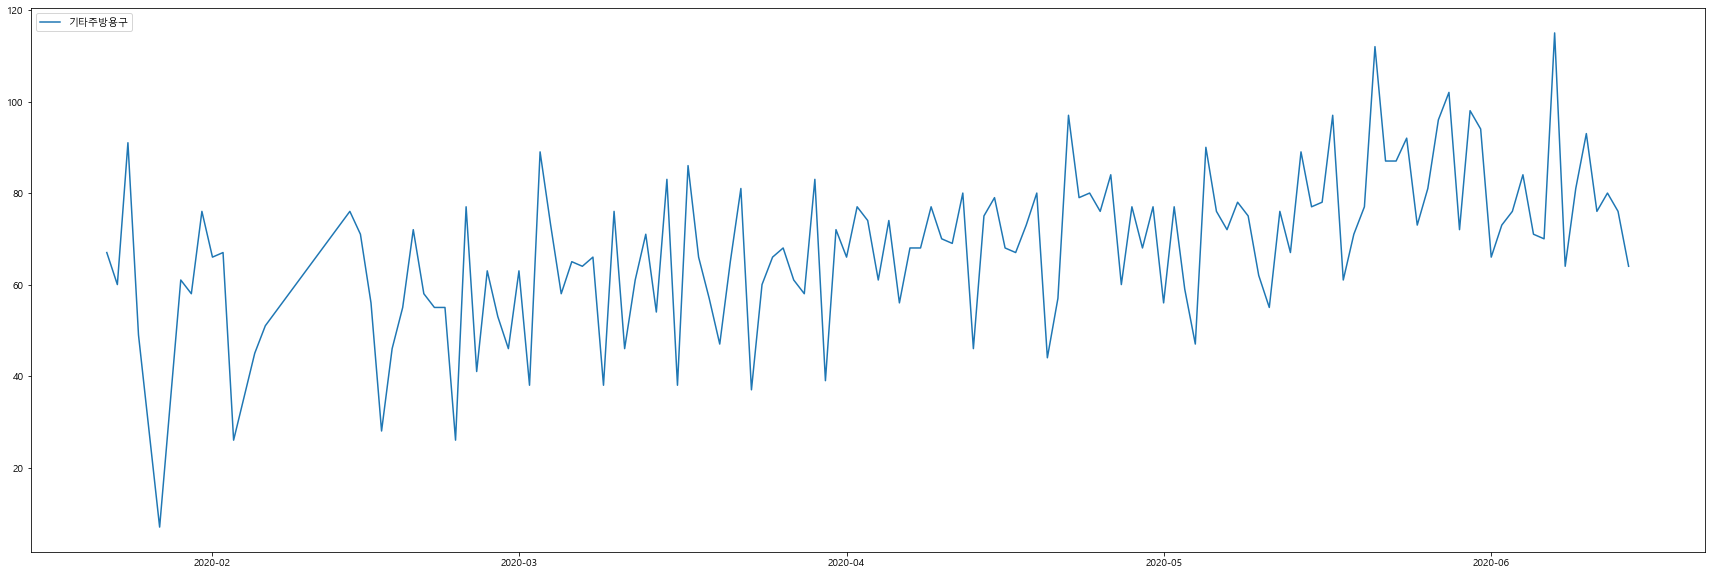

In [16]:
plt.figure(figsize=(30,10))
plt.plot(df_kit[df_kit['mrhst_induty_cl_nm']=='기타주방용구'].groupby('date').selng_cascnt_int.sum(), label='기타주방용구')
# plt.plot(df_kit[df_kit['mrhst_induty_cl_nm']=='정 수 기'].groupby('date').selng_cascnt_int.sum(), label='정 수 기')
# plt.plot(df_kit[df_kit['mrhst_induty_cl_nm']=='주방 용구'].groupby('date').selng_cascnt_int.sum(), label='주방 용구')
# plt.plot(df_kit[df_kit['mrhst_induty_cl_nm']=='주방용식기'].groupby('date').selng_cascnt_int.sum(), label='주방용식기')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 주방용구, 주방용 식기, 기타주방용구

- 하향:

- 유지: 정수기

# 연료(33__)

In [17]:
df_fuel = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 33]
set(df_fuel['mrhst_induty_cl_nm'].values)

{'L P G', '기타연료', '유류 판매', '전기차충전소', '주 유 소'}

C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


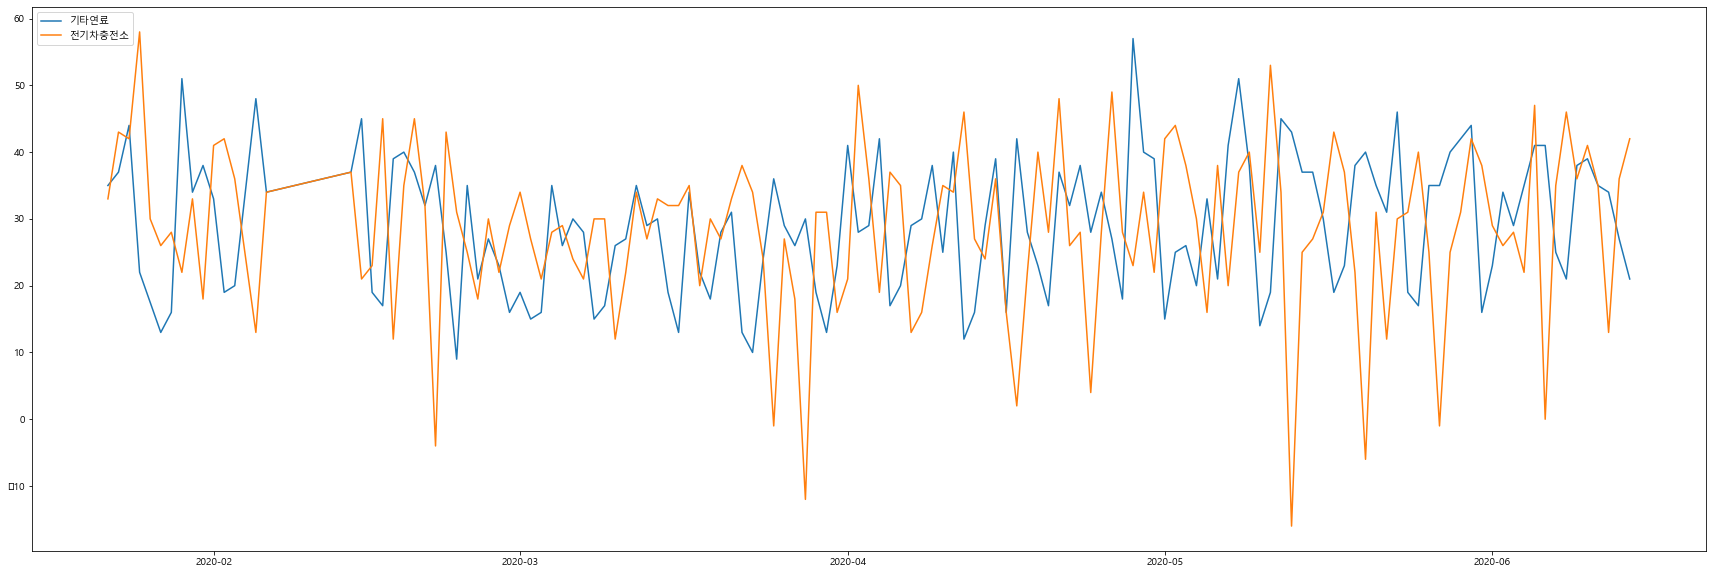

In [21]:
plt.figure(figsize=(30,10))
# plt.plot(df_fuel[df_fuel['mrhst_induty_cl_nm']=='L P G'].groupby('date').selng_cascnt_int.sum(), label='L P G')
plt.plot(df_fuel[df_fuel['mrhst_induty_cl_nm']=='기타연료'].groupby('date').selng_cascnt_int.sum(), label='기타연료')
# plt.plot(df_fuel[df_fuel['mrhst_induty_cl_nm']=='유류 판매'].groupby('date').selng_cascnt_int.sum(), label='유류 판매')
plt.plot(df_fuel[df_fuel['mrhst_induty_cl_nm']=='전기차충전소'].groupby('date').selng_cascnt_int.sum(), label='전기차충전소')
# plt.plot(df_fuel[df_fuel['mrhst_induty_cl_nm']=='주 유 소'].groupby('date').selng_cascnt_int.sum(), label='주 유 소')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 

- 하향: 유류판매

- 유지: 주유소, LPG, 기타연료, 전기차충전소

# 사진(34__)

In [22]:
df_pic = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 34]
set(df_pic['mrhst_induty_cl_nm'].values)

{'기타광학품', '사진관', '카 메 라'}

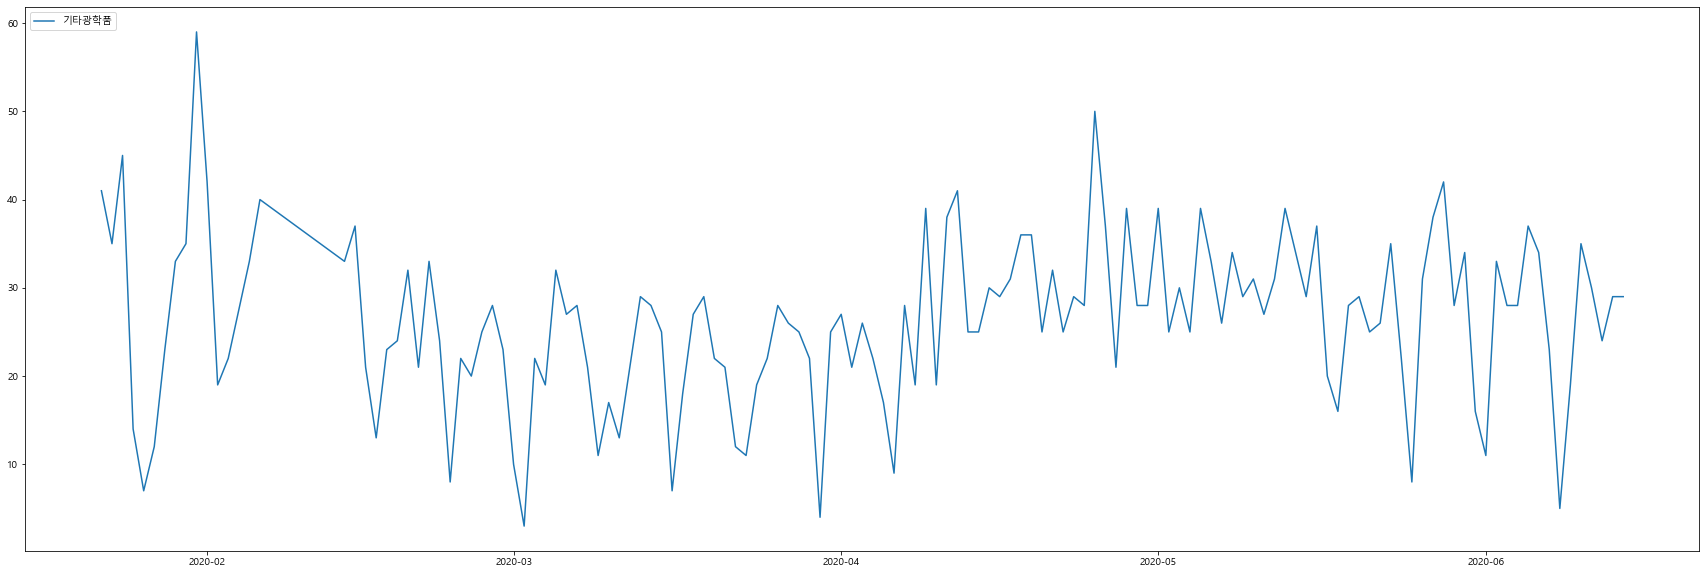

In [25]:
plt.figure(figsize=(30,10))
plt.plot(df_pic[df_pic['mrhst_induty_cl_nm']=='기타광학품'].groupby('date').selng_cascnt_int.sum(), label='기타광학품')
# plt.plot(df_pic[df_pic['mrhst_induty_cl_nm']=='사진관'].groupby('date').selng_cascnt_int.sum(), label='사진관')
# plt.plot(df_pic[df_pic['mrhst_induty_cl_nm']=='카 메 라'].groupby('date').selng_cascnt_int.sum(), label='카 메 라')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 

- 하향: 기타광학품

- 유지: 사진관, 카메라

# 마트(40__)

In [26]:
df_mart = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 40]
set(df_mart['mrhst_induty_cl_nm'].values)

{'CATV홈쇼핑',
 'PG 상품권',
 '기타유통업',
 '농축수산가공품',
 '대형할인점',
 '면 세 점',
 '상품권',
 '상품권 전문판매',
 '슈퍼 마켓',
 '연 쇄 점',
 '인터넷Mall',
 '인터넷P/G',
 '인터넷종합Mall',
 '일반백화점',
 '자사카드발행백화점',
 '전자상거래 상품권',
 '전자상거래 상품권 전문판매',
 '통신판매1',
 '통신판매2',
 '편 의 점'}

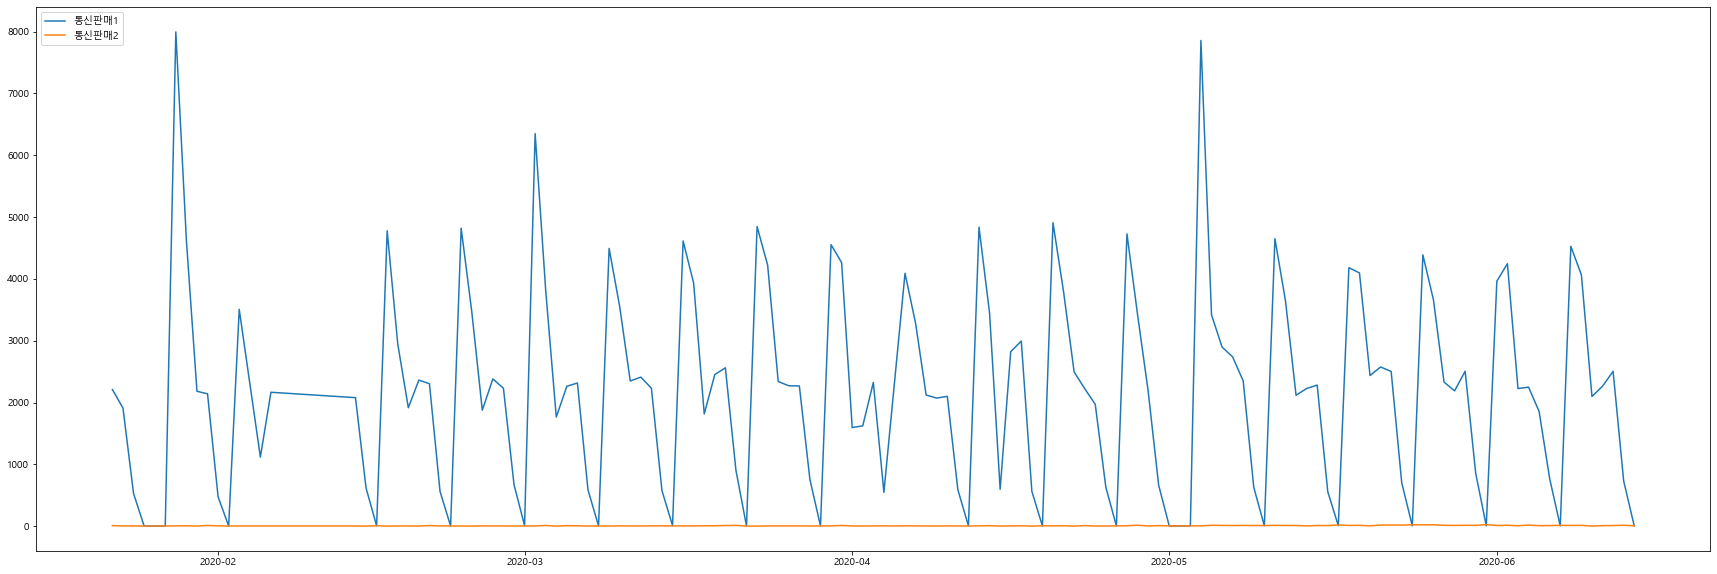

In [47]:
plt.figure(figsize=(30,10))
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='CATV홈쇼핑'].groupby('date').selng_cascnt_int.sum(), label='CATV홈쇼핑')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='PG 상품권'].groupby('date').selng_cascnt_int.sum(), label='PG 상품권')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='기타유통업'].groupby('date').selng_cascnt_int.sum(), label='기타유통업')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='대형할인점'].groupby('date').selng_cascnt_int.sum(), label='대형할인점')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='면 세 점'].groupby('date').selng_cascnt_int.sum(), label='면 세 점')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='상품권'].groupby('date').selng_cascnt_int.sum(), label='상품권')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='상품권 전문판매'].groupby('date').selng_cascnt_int.sum(), label='상품권 전문판매')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='슈퍼 마켓'].groupby('date').selng_cascnt_int.sum(), label='슈퍼 마켓')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='연 쇄 점'].groupby('date').selng_cascnt_int.sum(), label='연 쇄 점')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='인터넷Mall'].groupby('date').selng_cascnt_int.sum(), label='인터넷Mall')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='인터넷P/G'].groupby('date').selng_cascnt_int.sum(), label='인터넷P/G')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='인터넷종합Mall'].groupby('date').selng_cascnt_int.sum(), label='인터넷종합Mall')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='일반백화점'].groupby('date').selng_cascnt_int.sum(), label='일반백화점')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='자사카드발행백화점'].groupby('date').selng_cascnt_int.sum(), label='자사카드발행백화점')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='전자상거래 상품권'].groupby('date').selng_cascnt_int.sum(), label='전자상거래 상품권')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='전자상거래 상품권 전문판매'].groupby('date').selng_cascnt_int.sum(), label='전자상거래 상품권 전문판매')
plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='통신판매1'].groupby('date').selng_cascnt_int.sum(), label='통신판매1')
plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='통신판매2'].groupby('date').selng_cascnt_int.sum(), label='통신판매2')
# plt.plot(df_mart[df_mart['mrhst_induty_cl_nm']=='편 의 점'].groupby('date').selng_cascnt_int.sum(), label='편 의 점')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 연쇄점, 통신판매2

- 하향: 면세점

- 유지: 홈쇼핑, 편의점, 슈퍼마켓, 대형할인점, 인터넷, 상품권, 백화점, 통신판매1

# 매점(41__)

In [48]:
df_st = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 41]
set(df_st['mrhst_induty_cl_nm'].values)

{'공무원연금매점', '구내매점(국가기관등)', '기타비영리유통'}

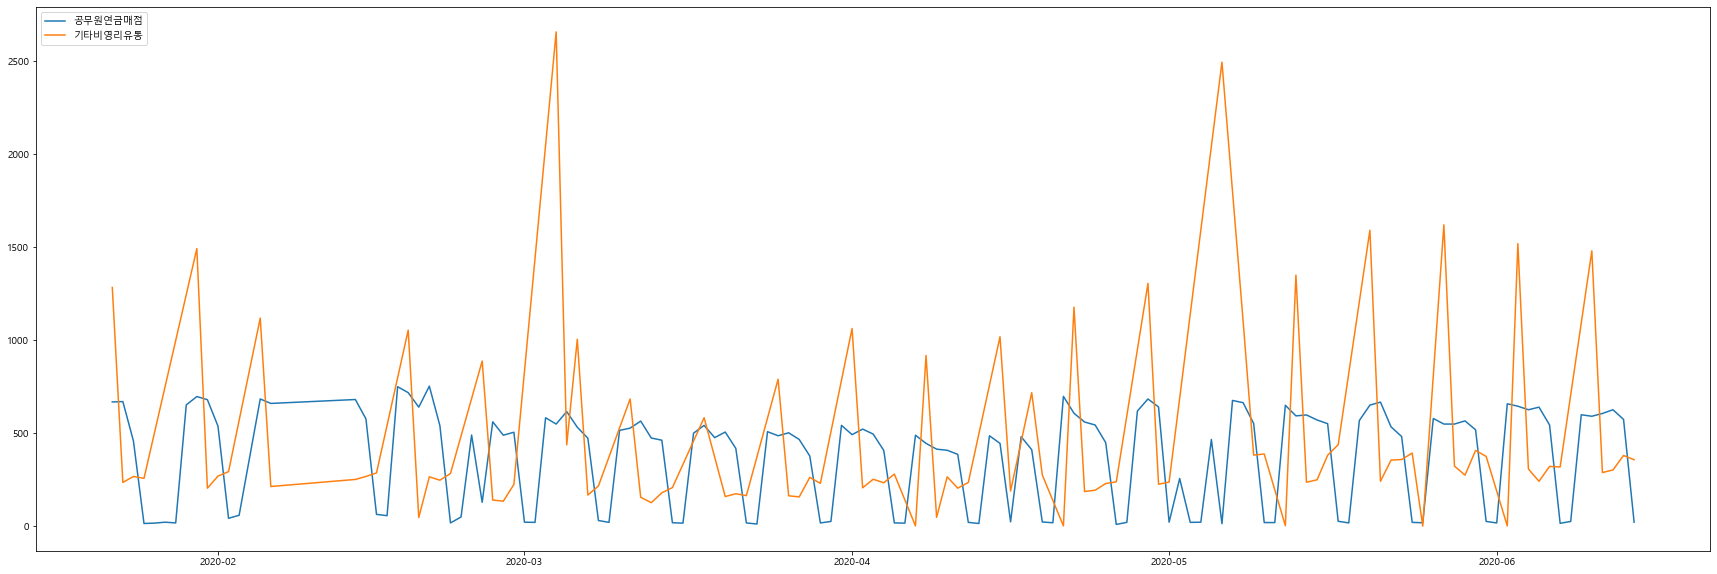

In [50]:
plt.figure(figsize=(30,10))
plt.plot(df_st[df_st['mrhst_induty_cl_nm']=='공무원연금매점'].groupby('date').selng_cascnt_int.sum(), label='공무원연금매점')
# plt.plot(df_st[df_st['mrhst_induty_cl_nm']=='구내매점(국가기관등)'].groupby('date').selng_cascnt_int.sum(), label='구내매점(국가기관등)')
plt.plot(df_st[df_st['mrhst_induty_cl_nm']=='기타비영리유통'].groupby('date').selng_cascnt_int.sum(), label='기타비영리유통')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 

- 하향: 

- 유지: 구내매점, 기타비영리유통, 공무원연금매점

# 직물(43__)

In [51]:
df_tx = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 43]
set(df_tx['mrhst_induty_cl_nm'].values)

{'기타직물', '옷감 직물', '침구수예점', '혼수전문점'}

C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


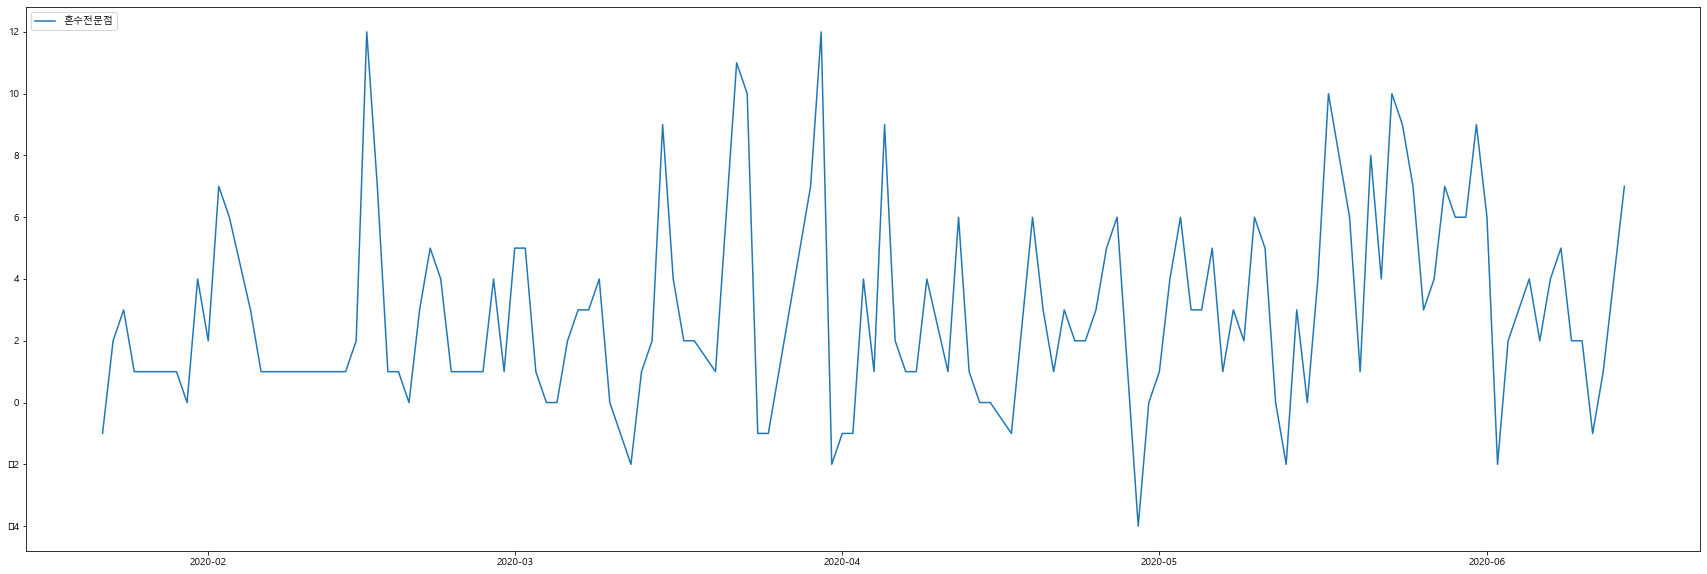

In [55]:
plt.figure(figsize=(30,10))
# plt.plot(df_tx[df_tx['mrhst_induty_cl_nm']=='기타직물'].groupby('date').selng_cascnt_int.sum(), label='기타직물')
# plt.plot(df_tx[df_tx['mrhst_induty_cl_nm']=='옷감 직물'].groupby('date').selng_cascnt_int.sum(), label='옷감 직물')
# plt.plot(df_tx[df_tx['mrhst_induty_cl_nm']=='침구수예점'].groupby('date').selng_cascnt_int.sum(), label='침구수예점')
plt.plot(df_tx[df_tx['mrhst_induty_cl_nm']=='혼수전문점'].groupby('date').selng_cascnt_int.sum(), label='혼수전문점')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 침구수예점, 옷감직물

- 하향: 

- 유지: 기타직물, 혼수전문점

# 잡화(44__)

In [56]:
df_ac = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 44]
set(df_ac['mrhst_induty_cl_nm'].values)

{'가   방',
 '귀 금 속',
 '기념품 점',
 '기타잡화',
 '성인용품점',
 '시   계',
 '신   발',
 '악세 사리',
 '제 화 점'}

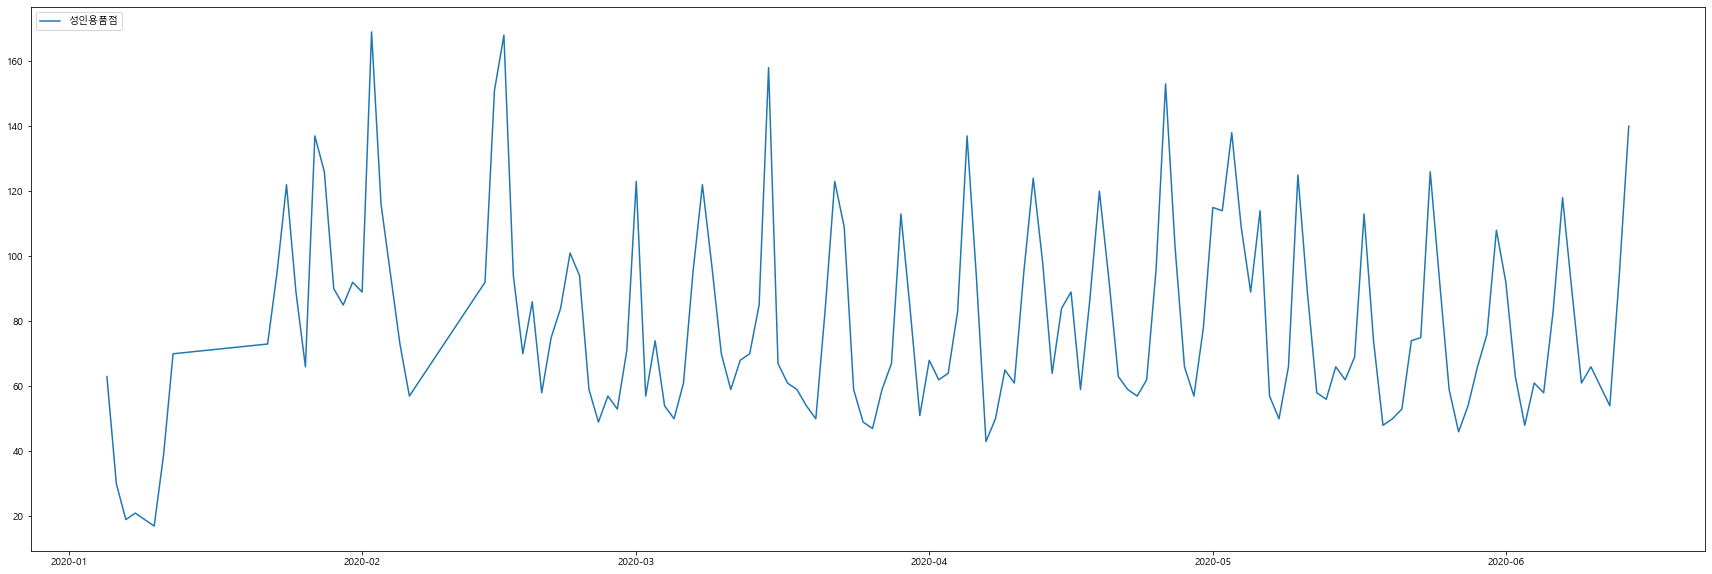

In [65]:
plt.figure(figsize=(30,10))
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='가   방'].groupby('date').selng_cascnt_int.sum(), label='가   방')
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='귀 금 속'].groupby('date').selng_cascnt_int.sum(), label='귀 금 속')
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='기념품 점'].groupby('date').selng_cascnt_int.sum(), label='기념품 점')
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='기타잡화'].groupby('date').selng_cascnt_int.sum(), label='기타잡화')
plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='성인용품점'].groupby('date').selng_cascnt_int.sum(), label='성인용품점')
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='시   계'].groupby('date').selng_cascnt_int.sum(), label='시   계')
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='신   발'].groupby('date').selng_cascnt_int.sum(), label='신   발')
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='악세 사리'].groupby('date').selng_cascnt_int.sum(), label='악세 사리')
# plt.plot(df_ac[df_ac['mrhst_induty_cl_nm']=='제 화 점'].groupby('date').selng_cascnt_int.sum(), label='제 화 점')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 기타잡화, 신발, 가방, 제화점, 시계

- 하향: 기념품

- 유지: 악세사리, 귀금속, 성인용품

# 책(50__)

In [67]:
df_book = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 50]
set(df_book['mrhst_induty_cl_nm'].values)

{'과학기자재',
 '교육테이프',
 '기타서적문구',
 '문구용 품',
 '완 구 점',
 '일반 서적',
 '전문 서적',
 '정기간행물',
 '출판인쇄물'}

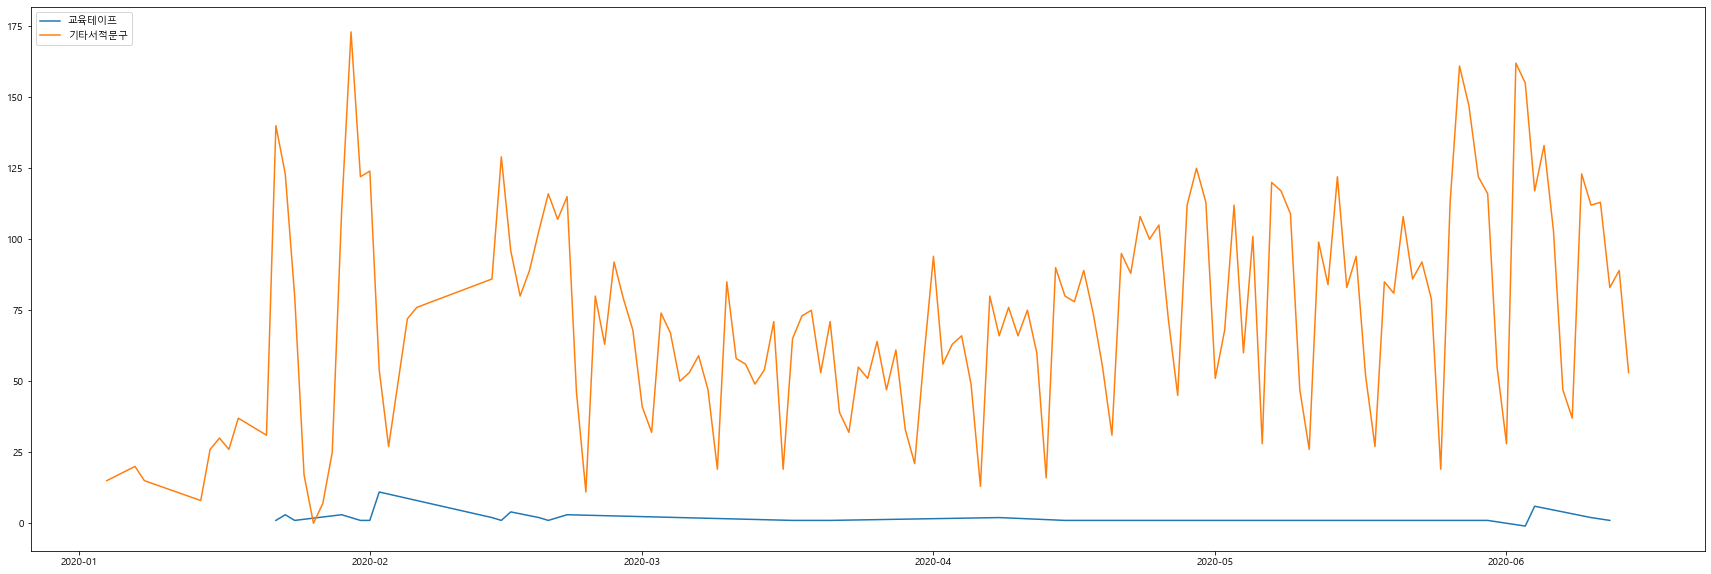

In [77]:
plt.figure(figsize=(30,10))
# plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='과학기자재'].groupby('date').selng_cascnt_int.sum(), label='과학기자재')
plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='교육테이프'].groupby('date').selng_cascnt_int.sum(), label='교육테이프')
plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='기타서적문구'].groupby('date').selng_cascnt_int.sum(), label='기타서적문구')
# plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='문구용 품'].groupby('date').selng_cascnt_int.sum(), label='문구용 품')
# plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='완 구 점'].groupby('date').selng_cascnt_int.sum(), label='완 구 점')
# plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='일반 서적'].groupby('date').selng_cascnt_int.sum(), label='일반 서적')
# plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='전문 서적'].groupby('date').selng_cascnt_int.sum(), label='전문 서적')
# plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='정기간행물'].groupby('date').selng_cascnt_int.sum(), label='정기간행물')
# plt.plot(df_book[df_book['mrhst_induty_cl_nm']=='출판인쇄물'].groupby('date').selng_cascnt_int.sum(), label='출판인쇄물')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 문구용품, 완구점, 과학기자재, 기타서적문구

- 하향: 교육테이프

- 유지: 출판인쇄물, 일반서적, 전문서적, 정기간행물

# 학원(51__)

In [78]:
df_academy = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 51]
set(df_academy['mrhst_induty_cl_nm'].values)

{'기능학원',
 '기타 교육',
 '대학등록금',
 '독서실',
 '보습학원',
 '예체능학원',
 '외국어학원',
 '유아원',
 '유치원',
 '유학원',
 '초중고교육기관',
 '컴퓨터학원',
 '학습지교육'}

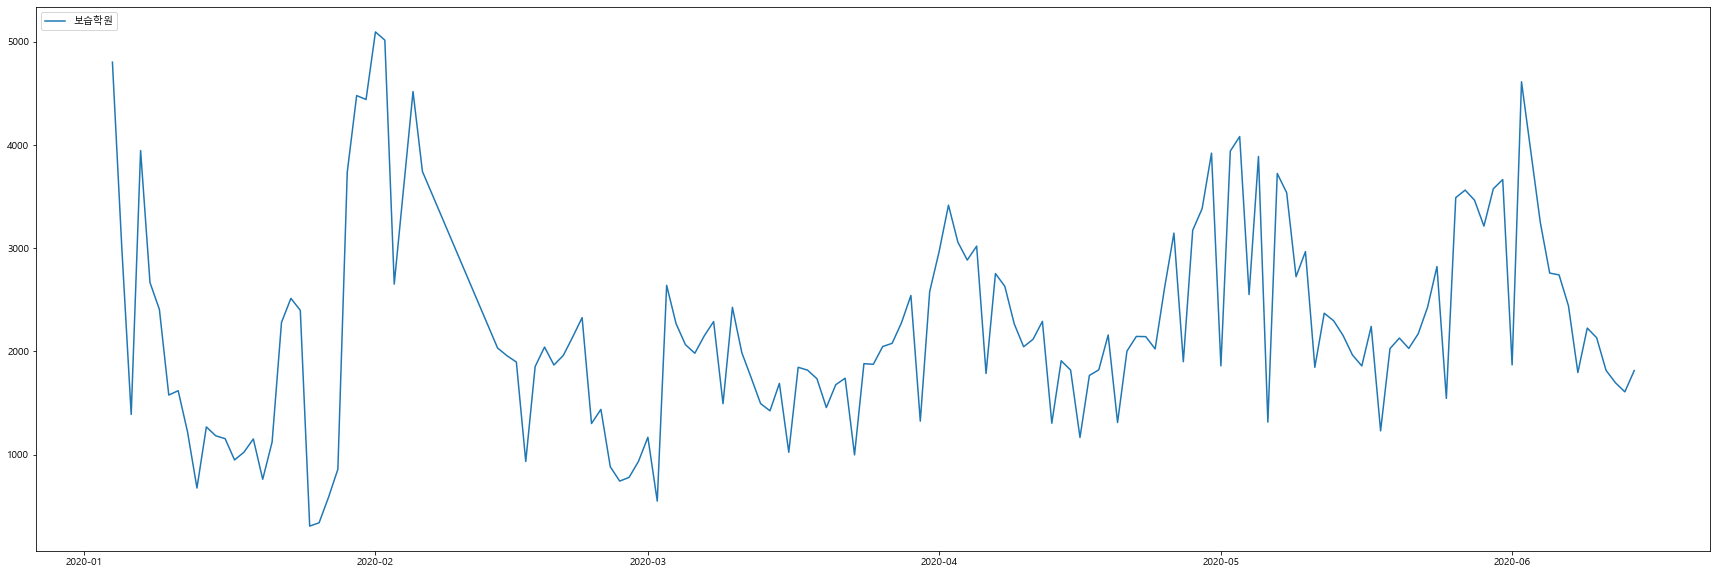

In [208]:
plt.figure(figsize=(30,10))
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='기능학원'].groupby('date').selng_cascnt_int.sum(), label='기능학원')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='기타 교육'].groupby('date').selng_cascnt_int.sum(), label='기타 교육')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='대학등록금'].groupby('date').selng_cascnt_int.sum(), label='대학등록금')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='독서실'].groupby('date').selng_cascnt_int.sum(), label='독서실')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='예체능학원'].groupby('date').selng_cascnt_int.sum(), label='예체능학원')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='외국어학원'].groupby('date').selng_cascnt_int.sum(), label='외국어학원')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='유아원'].groupby('date').selng_cascnt_int.sum(), label='유아원')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='유치원'].groupby('date').selng_cascnt_int.sum(), label='유치원')
plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='보습학원'].groupby('date').selng_cascnt_int.sum(), label='보습학원')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='초중고교육기관'].groupby('date').selng_cascnt_int.sum(), label='초중고교육기관')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='컴퓨터학원'].groupby('date').selng_cascnt_int.sum(), label='컴퓨터학원')
# plt.plot(df_academy[df_academy['mrhst_induty_cl_nm']=='학습지교육'].groupby('date').selng_cascnt_int.sum(), label='학습지교육')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 예체능, 외국어, 기타교육, 독서실

- 하향: 초중고, 대학등록금, 유치원

- 유지: 학습지교육, 유아원, 기능학원, 컴퓨터, 유학원

# 사무(52__)

In [88]:
df_pen = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 52]
set(df_pen['mrhst_induty_cl_nm'].values)

{'기타사무용품', '사무 기기', '전자(상우회)', '컴 퓨 터', '통신 기기', '통신기기무이자할부'}

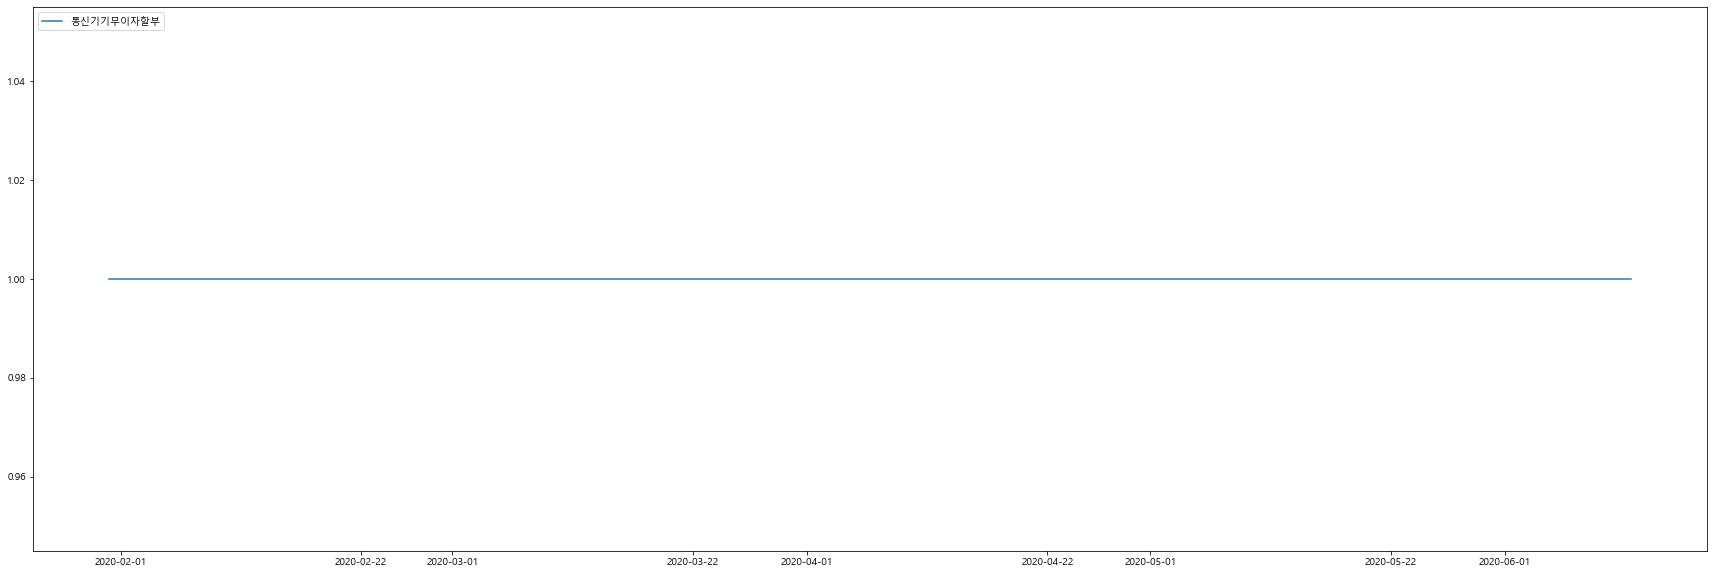

In [94]:
plt.figure(figsize=(30,10))
# plt.plot(df_pen[df_pen['mrhst_induty_cl_nm']=='기타사무용품'].groupby('date').selng_cascnt_int.sum(), label='기타사무용품')
# plt.plot(df_pen[df_pen['mrhst_induty_cl_nm']=='사무 기기'].groupby('date').selng_cascnt_int.sum(), label='사무 기기')
# plt.plot(df_pen[df_pen['mrhst_induty_cl_nm']=='전자(상우회)'].groupby('date').selng_cascnt_int.sum(), label='전자(상우회)')
# plt.plot(df_pen[df_pen['mrhst_induty_cl_nm']=='컴 퓨 터'].groupby('date').selng_cascnt_int.sum(), label='컴 퓨 터')
# plt.plot(df_pen[df_pen['mrhst_induty_cl_nm']=='통신 기기'].groupby('date').selng_cascnt_int.sum(), label='통신 기기')
plt.plot(df_pen[df_pen['mrhst_induty_cl_nm']=='통신기기무이자할부'].groupby('date').selng_cascnt_int.sum(), label='통신기기무이자할부')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 기타사무용품, 컴퓨터, 사무기기

- 하향: 

- 유지: 통신기기, 전자, 통신할부

# 자동차(60__)

In [96]:
df_car = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 60]
set(df_car['mrhst_induty_cl_nm'].values)

{'국산 신차', '기타 운송', '수입자동차', '이륜차판매', '중고자동차', '중고자동차위탁판매'}

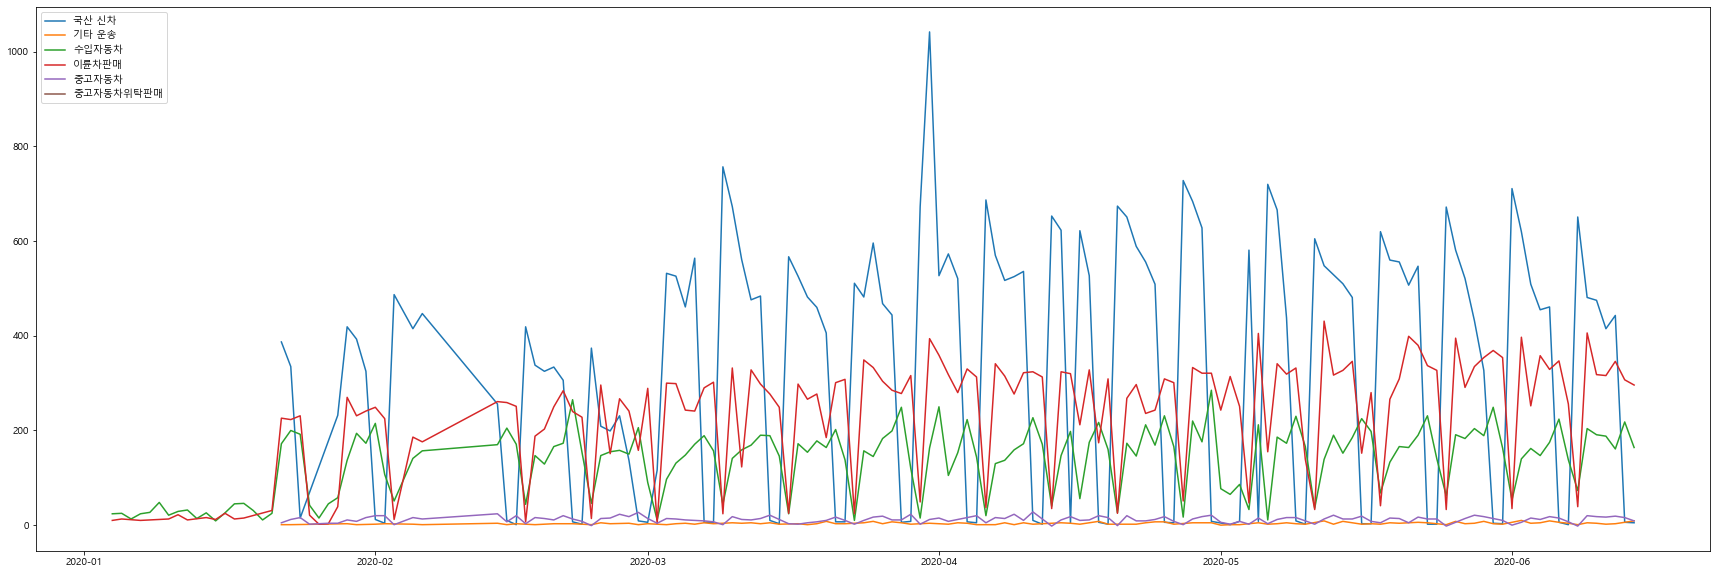

In [103]:
plt.figure(figsize=(30,10))
plt.plot(df_car[df_car['mrhst_induty_cl_nm']=='국산 신차'].groupby('date').selng_cascnt_int.sum(), label='국산 신차')
plt.plot(df_car[df_car['mrhst_induty_cl_nm']=='기타 운송'].groupby('date').selng_cascnt_int.sum(), label='기타 운송')
plt.plot(df_car[df_car['mrhst_induty_cl_nm']=='수입자동차'].groupby('date').selng_cascnt_int.sum(), label='수입자동차')
plt.plot(df_car[df_car['mrhst_induty_cl_nm']=='이륜차판매'].groupby('date').selng_cascnt_int.sum(), label='이륜차판매')
plt.plot(df_car[df_car['mrhst_induty_cl_nm']=='중고자동차'].groupby('date').selng_cascnt_int.sum(), label='중고자동차')
plt.plot(df_car[df_car['mrhst_induty_cl_nm']=='중고자동차위탁판매'].groupby('date').selng_cascnt_int.sum(), label='중고자동차위탁판매')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 국산신차, 이륜차, 기타운송

- 하향: 

- 유지: 수입차, 중고차

# 차수리(61__)

In [105]:
df_rep = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 61]
set(df_rep['mrhst_induty_cl_nm'].values)

{'견인서비스',
 '국산신차직영부품/정비업소',
 '기타자동차서비스',
 '세 차 장',
 '윤활유전문판매',
 '자동차부품',
 '자동차시트/타이어',
 '자동차정비',
 '주 차 장',
 '중장비수리',
 '카인테리어'}

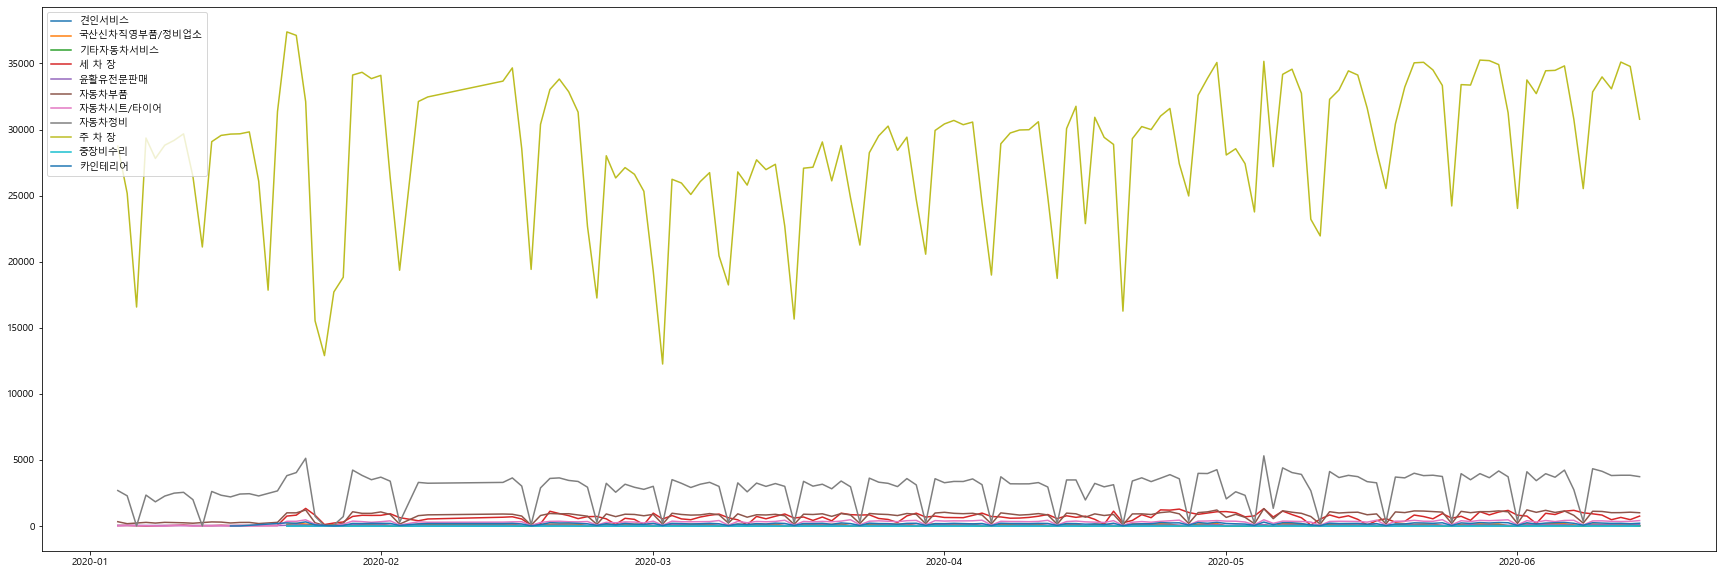

In [118]:
plt.figure(figsize=(30,10))
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='견인서비스'].groupby('date').selng_cascnt_int.sum(), label='견인서비스')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='국산신차직영부품/정비업소'].groupby('date').selng_cascnt_int.sum(), label='국산신차직영부품/정비업소')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='기타자동차서비스'].groupby('date').selng_cascnt_int.sum(), label='기타자동차서비스')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='세 차 장'].groupby('date').selng_cascnt_int.sum(), label='세 차 장')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='윤활유전문판매'].groupby('date').selng_cascnt_int.sum(), label='윤활유전문판매')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='자동차부품'].groupby('date').selng_cascnt_int.sum(), label='자동차부품')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='자동차시트/타이어'].groupby('date').selng_cascnt_int.sum(), label='자동차시트/타이어')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='자동차정비'].groupby('date').selng_cascnt_int.sum(), label='자동차정비')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='주 차 장'].groupby('date').selng_cascnt_int.sum(), label='주 차 장')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='중장비수리'].groupby('date').selng_cascnt_int.sum(), label='중장비수리')
plt.plot(df_rep[df_rep['mrhst_induty_cl_nm']=='카인테리어'].groupby('date').selng_cascnt_int.sum(), label='카인테리어')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 

- 하향: 

- 유지: 주차장, 자동차정비, 중장비수리, 견인

# 보험(62__)

In [119]:
df_insu = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 62]
set(df_insu['mrhst_induty_cl_nm'].values)

{'기타보험', '생명 보험', '손해 보험'}

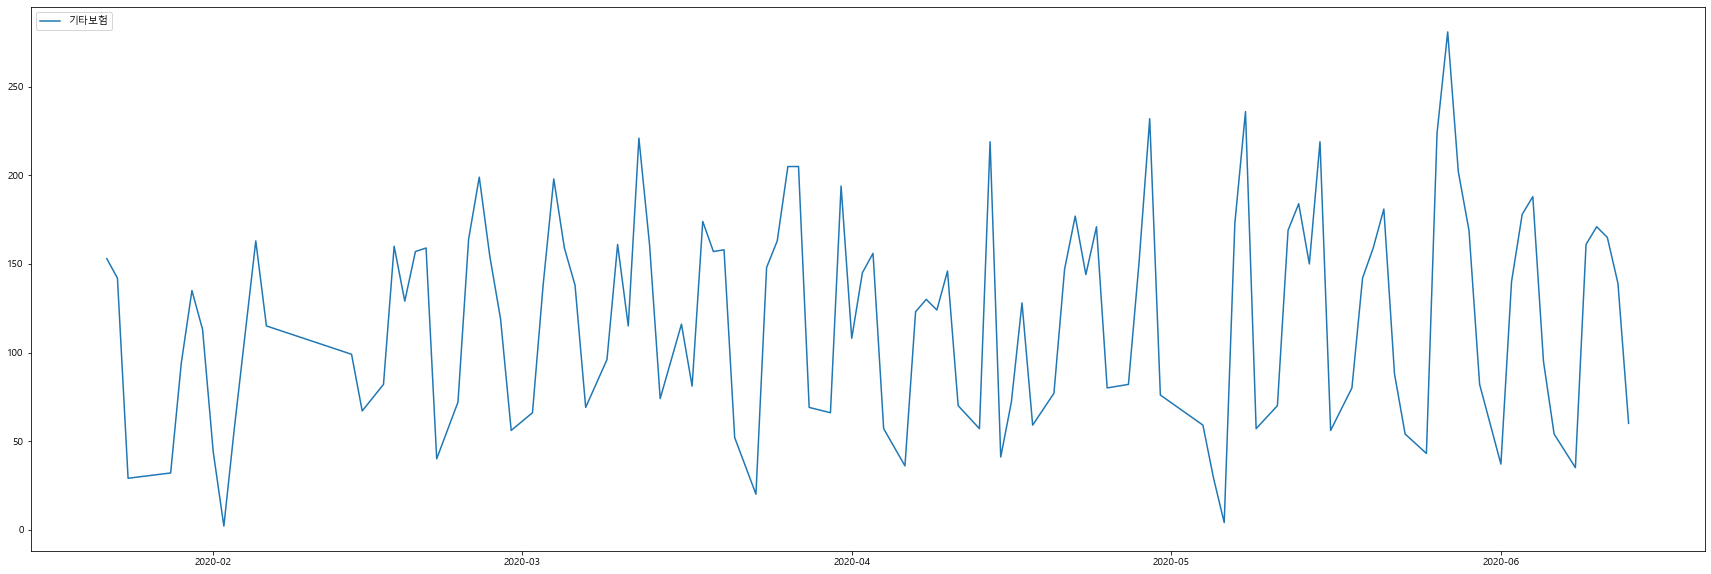

In [124]:
plt.figure(figsize=(30,10))
plt.plot(df_insu[df_insu['mrhst_induty_cl_nm']=='기타보험'].groupby('date').selng_cascnt_int.sum(), label='기타보험')
# plt.plot(df_insu[df_insu['mrhst_induty_cl_nm']=='생명 보험'].groupby('date').selng_cascnt_int.sum(), label='생명 보험')
# plt.plot(df_insu[df_insu['mrhst_induty_cl_nm']=='손해 보험'].groupby('date').selng_cascnt_int.sum(), label='손해 보험')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 

- 하향: 

- 유지: 생명보험, 손해보험, 기타보험

# 병원(70__)

In [126]:
df_medic = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 70]
set(df_medic['mrhst_induty_cl_nm'].values)

{'건강진단',
 '기타의료기관및기타의료기기',
 '동물병원',
 '병원',
 '산후조리원',
 '약국',
 '의원',
 '제약회사',
 '조산원',
 '종합병원',
 '치과병원',
 '치과의원',
 '한방병원',
 '한약방',
 '한의원'}

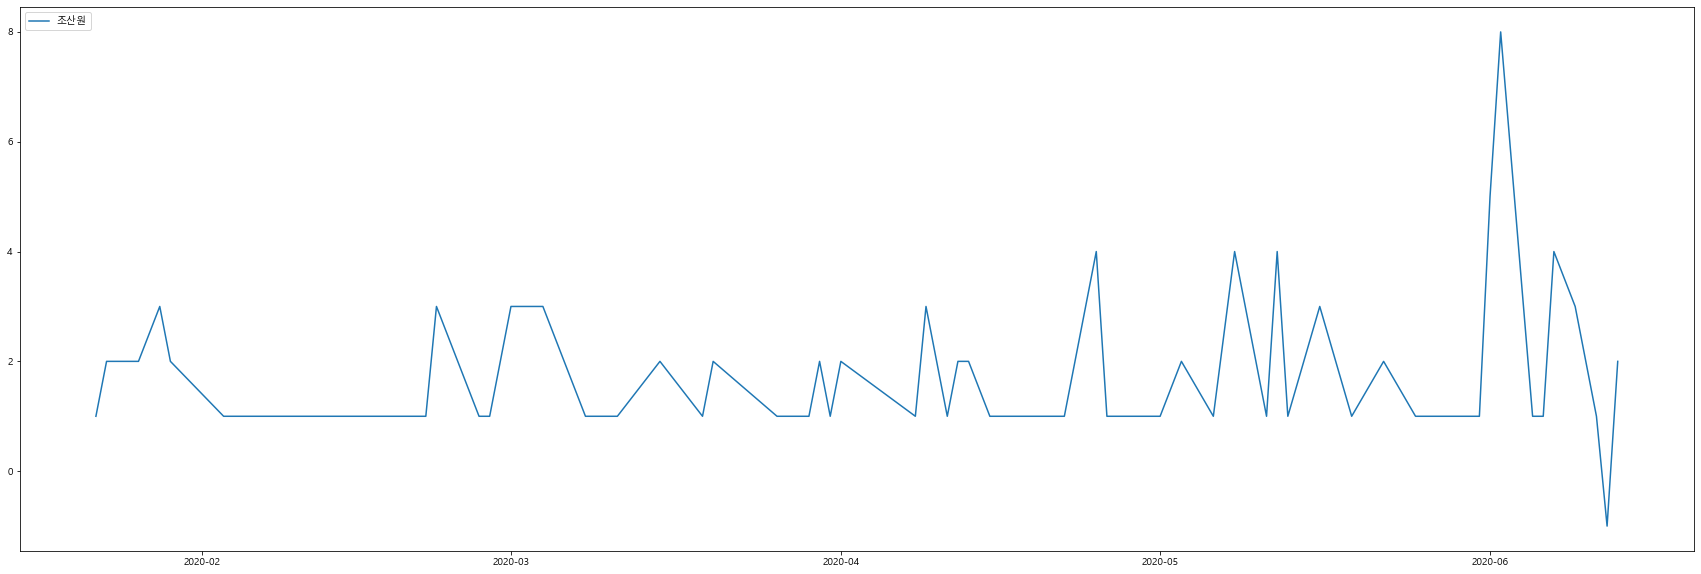

In [143]:
plt.figure(figsize=(30,10))
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='건강진단'].groupby('date').selng_cascnt_int.sum(), label='건강진단')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='기타의료기관및기타의료기기'].groupby('date').selng_cascnt_int.sum(), label='기타의료기관및기타의료기기')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='동물병원'].groupby('date').selng_cascnt_int.sum(), label='동물병원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='병원'].groupby('date').selng_cascnt_int.sum(), label='병원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='산후조리원'].groupby('date').selng_cascnt_int.sum(), label='산후조리원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='약국'].groupby('date').selng_cascnt_int.sum(), label='약국')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='의원'].groupby('date').selng_cascnt_int.sum(), label='의원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='제약회사'].groupby('date').selng_cascnt_int.sum(), label='제약회사')
plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='조산원'].groupby('date').selng_cascnt_int.sum(), label='조산원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='종합병원'].groupby('date').selng_cascnt_int.sum(), label='종합병원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='치과병원'].groupby('date').selng_cascnt_int.sum(), label='치과병원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='치과의원'].groupby('date').selng_cascnt_int.sum(), label='치과의원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='한방병원'].groupby('date').selng_cascnt_int.sum(), label='한방병원')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='한약방'].groupby('date').selng_cascnt_int.sum(), label='한약방')
# plt.plot(df_medic[df_medic['mrhst_induty_cl_nm']=='한의원'].groupby('date').selng_cascnt_int.sum(), label='한의원')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 종합병원, 건강진단, 한의원, 병원

- 하향: 의원

- 유지: 약국, 기타의료, 치과, 동물병원, 제약회사, 치과병원, 한방병원, 한약방, 산후조리원, 조산원

# 미용(71__)

In [144]:
df_beauty = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 71]
set(df_beauty['mrhst_induty_cl_nm'].values)

{'기타대인서비스',
 '미 용 원',
 '미용 재료',
 '사우나',
 '안경',
 '안마/스포츠마사지',
 '의료 용품',
 '이 용 원',
 '피부미용실',
 '화 장 품'}

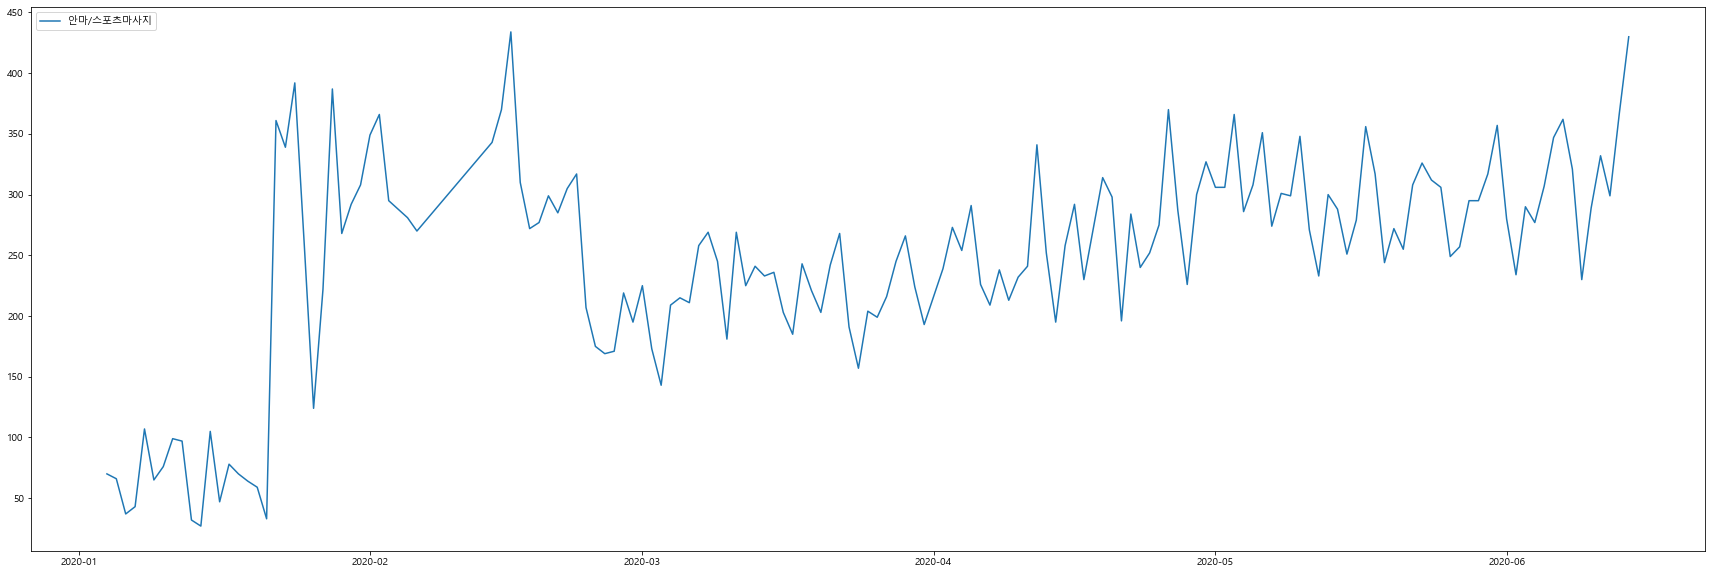

In [156]:
plt.figure(figsize=(30,10))
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='기타대인서비스'].groupby('date').selng_cascnt_int.sum(), label='기타대인서비스')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='미 용 원'].groupby('date').selng_cascnt_int.sum(), label='미 용 원')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='미용 재료'].groupby('date').selng_cascnt_int.sum(), label='미용 재료')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='사우나'].groupby('date').selng_cascnt_int.sum(), label='사우나')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='안경'].groupby('date').selng_cascnt_int.sum(), label='안경')
plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='안마/스포츠마사지'].groupby('date').selng_cascnt_int.sum(), label='안마/스포츠마사지')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='의료 용품'].groupby('date').selng_cascnt_int.sum(), label='의료 용품')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='이 용 원'].groupby('date').selng_cascnt_int.sum(), label='이 용 원')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='피부미용실'].groupby('date').selng_cascnt_int.sum(), label='피부미용실')
# plt.plot(df_beauty[df_beauty['mrhst_induty_cl_nm']=='화 장 품'].groupby('date').selng_cascnt_int.sum(), label='화 장 품')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 안경, 스포츠 마사지

- 하향: 

- 유지: 미용원, 화장품, 사우나, 의료용품, 피부미용실, 기타대인서비스, 미용재료, 이용원

# 식당(80__)

In [159]:
df_restaurant = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 80]
set(df_restaurant['mrhst_induty_cl_nm'].values)

{'갈비전문점', '서양음식', '스넥', '위탁급식업', '일반한식', '일식회집', '주점', '중국음식', '칵테일바', '한정식'}

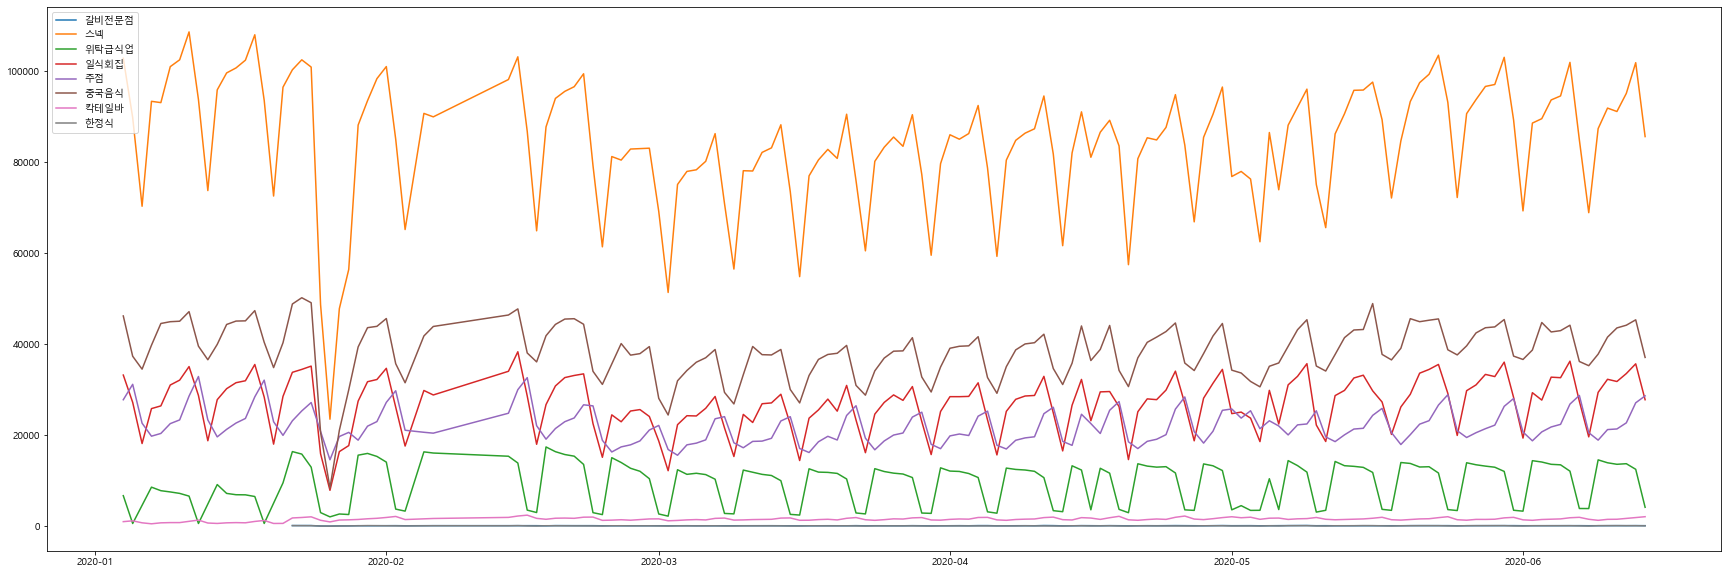

In [170]:
plt.figure(figsize=(30,10))
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='갈비전문점'].groupby('date').selng_cascnt_int.sum(), label='갈비전문점')
# plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='서양음식'].groupby('date').selng_cascnt_int.sum(), label='서양음식')
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='스넥'].groupby('date').selng_cascnt_int.sum(), label='스넥')
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='위탁급식업'].groupby('date').selng_cascnt_int.sum(), label='위탁급식업')
# plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='일반한식'].groupby('date').selng_cascnt_int.sum(), label='일반한식')
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='일식회집'].groupby('date').selng_cascnt_int.sum(), label='일식회집')
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='주점'].groupby('date').selng_cascnt_int.sum(), label='주점')
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='중국음식'].groupby('date').selng_cascnt_int.sum(), label='중국음식')
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='칵테일바'].groupby('date').selng_cascnt_int.sum(), label='칵테일바')
plt.plot(df_restaurant[df_restaurant['mrhst_induty_cl_nm']=='한정식'].groupby('date').selng_cascnt_int.sum(), label='한정식')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 한식, 양식

- 하향: 

- 유지: 스넥, 중식, 일식, 주점, 급식, 칵테일바, 갈비, 한정식

# 유흥주점(81__)

In [172]:
df_drunk = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 81]
set(df_drunk['mrhst_induty_cl_nm'].values)

{'유흥주점'}

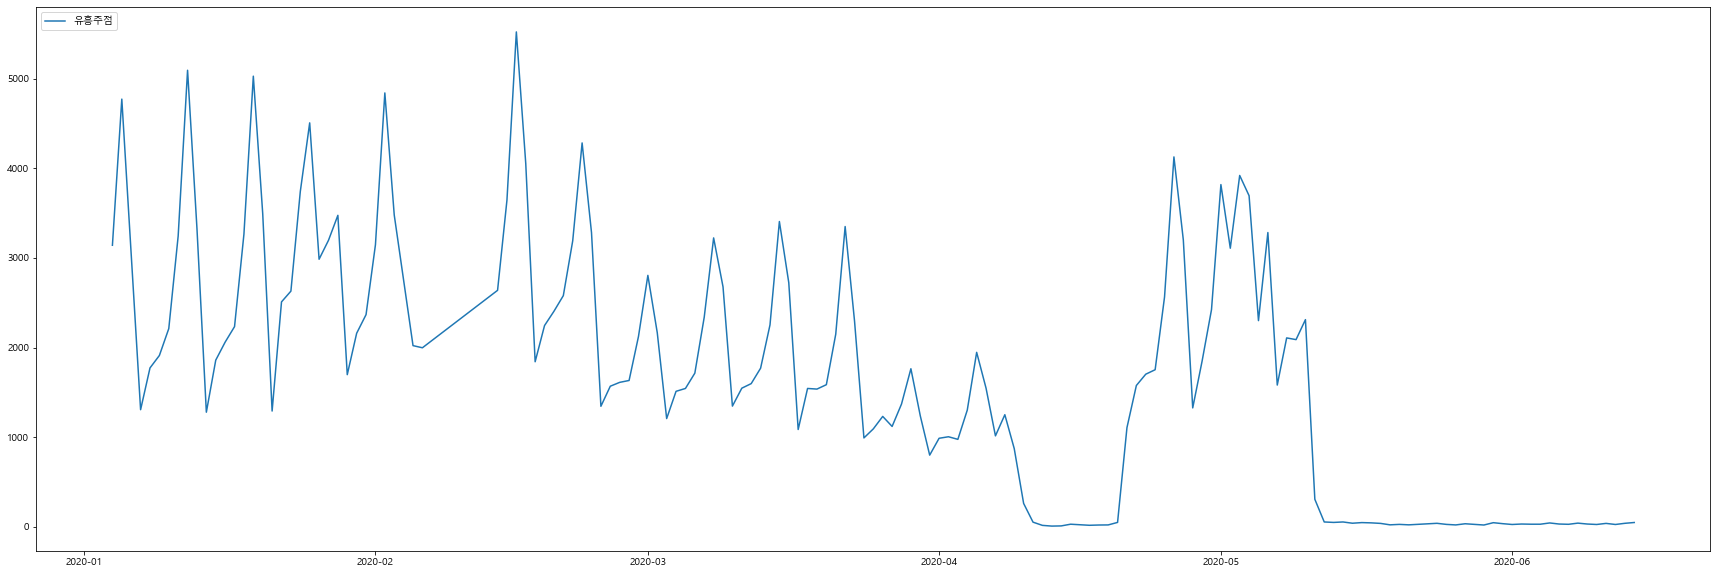

In [173]:
plt.figure(figsize=(30,10))
plt.plot(df_drunk[df_drunk['mrhst_induty_cl_nm']=='유흥주점'].groupby('date').selng_cascnt_int.sum(), label='유흥주점')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 

- 하향: 유흥주점**

- 유지: 

# 단란주점(82__)

In [174]:
df_drunk2 = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 82]
set(df_drunk2['mrhst_induty_cl_nm'].values)

{'단란주점'}

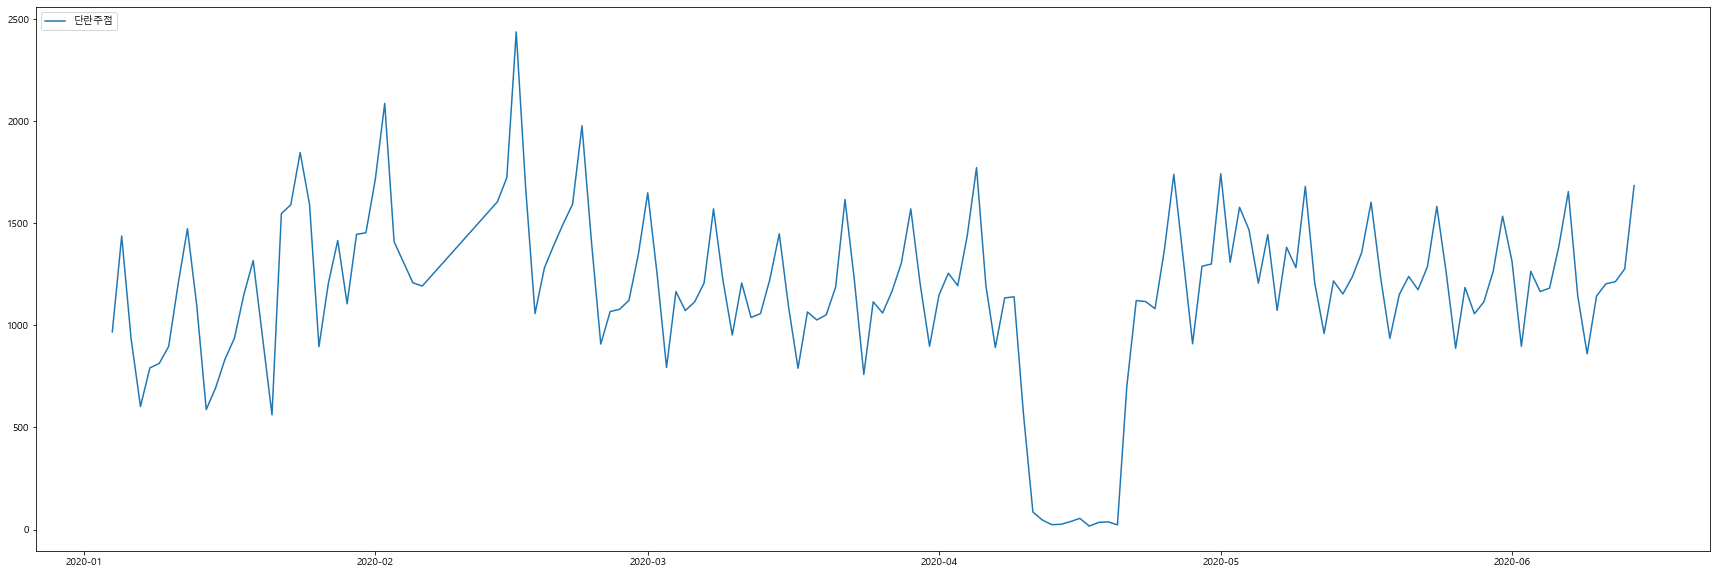

In [175]:
plt.figure(figsize=(30,10))
plt.plot(df_drunk2[df_drunk2['mrhst_induty_cl_nm']=='단란주점'].groupby('date').selng_cascnt_int.sum(), label='단란주점')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 

- 하향:

- 유지: 단란주점

# 식품(83__)

In [176]:
df_food = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 83]
set(df_food['mrhst_induty_cl_nm'].values)

{'기타음료식품', '농축수산품', '미곡상', '정 육 점', '제과점', '주류판매점'}

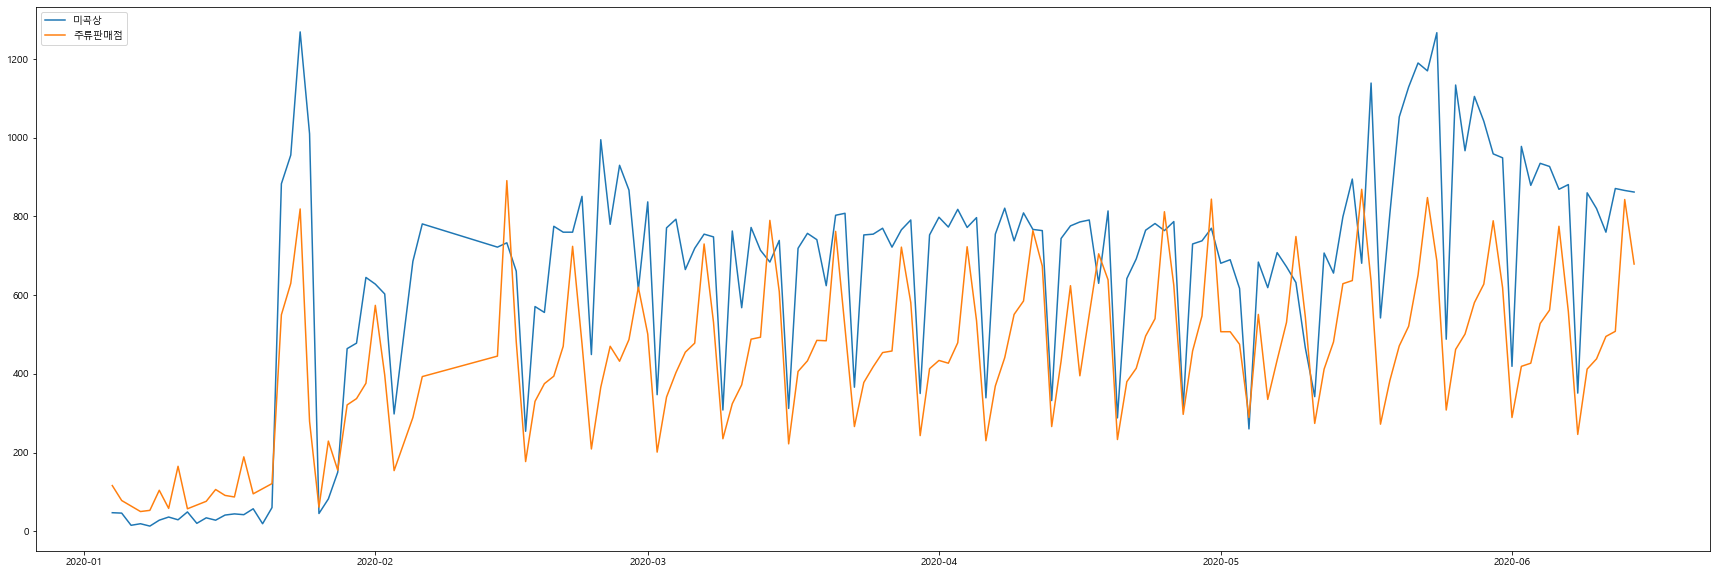

In [179]:
plt.figure(figsize=(30,10))
# plt.plot(df_food[df_food['mrhst_induty_cl_nm']=='기타음료식품'].groupby('date').selng_cascnt_int.sum(), label='기타음료식품')
# plt.plot(df_food[df_food['mrhst_induty_cl_nm']=='농축수산품'].groupby('date').selng_cascnt_int.sum(), label='단란주점')
plt.plot(df_food[df_food['mrhst_induty_cl_nm']=='미곡상'].groupby('date').selng_cascnt_int.sum(), label='미곡상')
# plt.plot(df_food[df_food['mrhst_induty_cl_nm']=='정 육 점'].groupby('date').selng_cascnt_int.sum(), label='정 육 점')
# plt.plot(df_food[df_food['mrhst_induty_cl_nm']=='제과점'].groupby('date').selng_cascnt_int.sum(), label='제과점')
plt.plot(df_food[df_food['mrhst_induty_cl_nm']=='주류판매점'].groupby('date').selng_cascnt_int.sum(), label='주류판매점')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 기타음료식품, 단란주점, 미곡상

- 하향:

- 유지: 제과점, 정육점, 주류판매점

# 건강식품(84__)

In [180]:
df_health = df_mod5[df_mod5['mrhst_induty_cl_code']//100 == 84]
set(df_health['mrhst_induty_cl_nm'].values)

{'기타건강식', '인삼 제품', '홍삼 제품'}

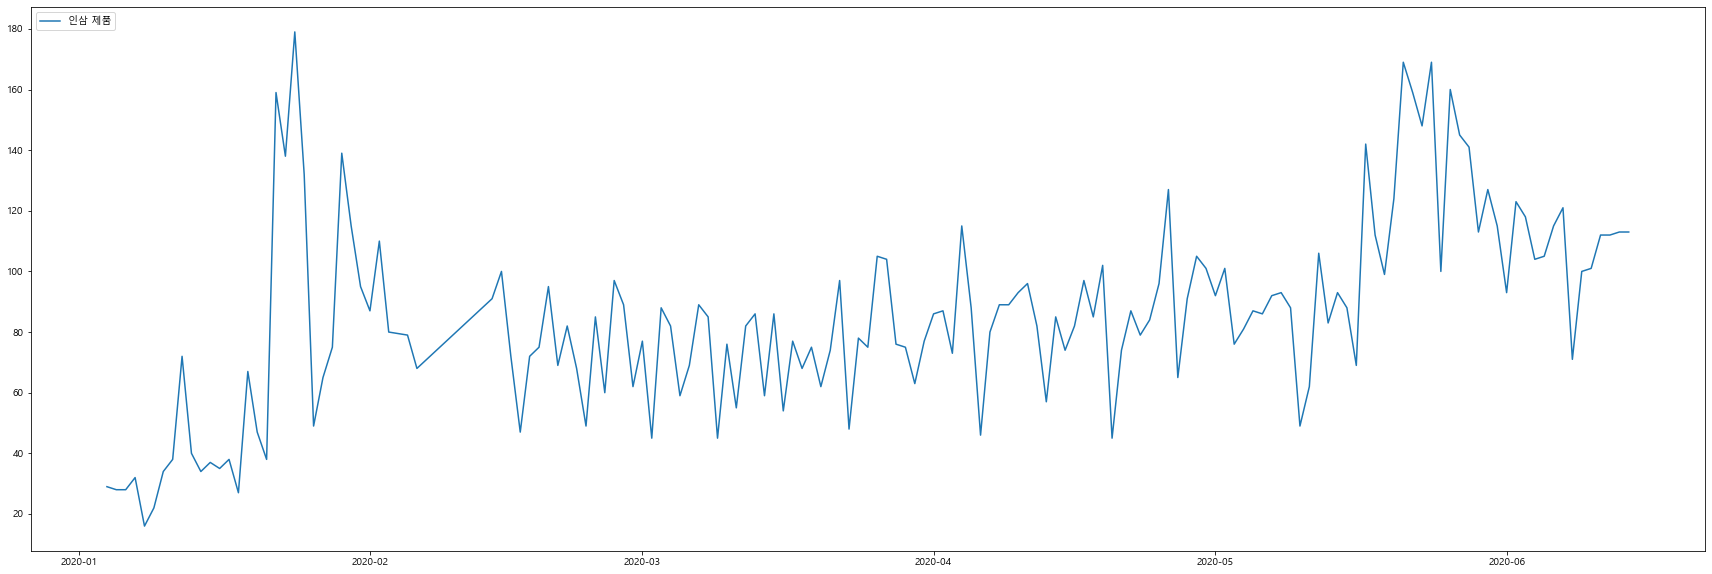

In [182]:
plt.figure(figsize=(30,10))
# plt.plot(df_health[df_health['mrhst_induty_cl_nm']=='기타건강식'].groupby('date').selng_cascnt_int.sum(), label='기타건강식')
plt.plot(df_health[df_health['mrhst_induty_cl_nm']=='인삼 제품'].groupby('date').selng_cascnt_int.sum(), label='인삼 제품')
# plt.plot(df_health[df_health['mrhst_induty_cl_nm']=='홍삼 제품'].groupby('date').selng_cascnt_int.sum(), label='홍삼 제품')
plt.legend(loc = 'upper left')
plt.show()

- 상향: 홍삼, 인삼*

- 하향:

- 유지: 기타건강식

In [212]:
df_mod5[df_mod5['mrhst_induty_cl_nm']=='인삼 제품']

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,selng_cascnt_int,date
7209,20200104,1123054500,제기동,8402,인삼 제품,29,5206000,29,2020-01-04
10329,20200105,1123054500,제기동,8402,인삼 제품,28,3034000,28,2020-01-05
17933,20200106,1123054500,제기동,8402,인삼 제품,28,2445000,28,2020-01-06
25265,20200107,1123054500,제기동,8402,인삼 제품,32,5558000,32,2020-01-07
32540,20200108,1123054500,제기동,8402,인삼 제품,16,2920000,16,2020-01-08
...,...,...,...,...,...,...,...,...,...
3774157,20200614,1156053500,영등포동,8402,인삼 제품,1,30000,1,2020-06-14
3774312,20200614,1159055000,상도3동,8402,인삼 제품,2,130000,2,2020-06-14
3777042,20200614,1154563000,독산3동,8402,인삼 제품,4,157000,4,2020-06-14
3777178,20200614,1153055000,구로4동,8402,인삼 제품,3,323000,3,2020-06-14


In [207]:
df_mod5[['mrhst_induty_cl_nm','mrhst_induty_cl_code']].drop_duplicates().to_csv('C:/data/df.csv',encoding='utf-8-sig')

In [216]:
df2 = pd.DataFrame(df_mod5[df_mod5['mrhst_induty_cl_code'] == 8402].groupby('date').selng_cascnt_int.sum())

# 예측 모형 만들기

In [234]:
#아리마 모형의 최적의 파라미터를 찾기 위한 함수
from pmdarima.arima import auto_arima
model=auto_arima(df2['selng_cascnt_int'],suppress_warnings=True)
model

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [235]:
model.order

(1, 1, 2)

In [218]:
n=int(df2.shape[0]*0.8)
print(n)
train=df2[:n]
test=df2[n:]

124


In [236]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['selng_cascnt_int'], order=model.order).fit()

C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


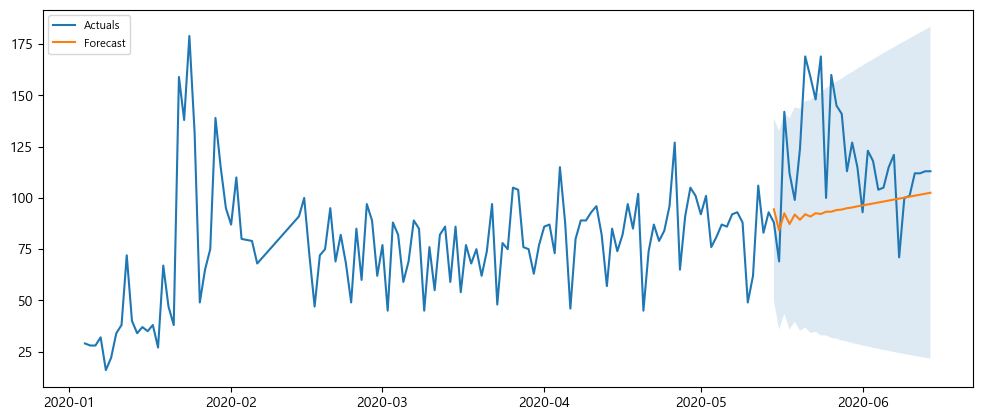

8.056156973741807


In [237]:
#예측값,오차,신뢰구간
fc,se,conf=model.forecast(steps=len(test))
fc_series=pd.Series(fc, index=test.index) #예측값
lower=pd.Series(conf[:,0], index=test.index) #하한값
upper=pd.Series(conf[:,1], index=test.index) #상한값
plt.figure(figsize=(12,5),dpi=100)
plt.plot(df2['selng_cascnt_int'], label='Actuals') #실제값
plt.plot(fc_series, label='Forecast') #예측값
# 예측값의 구간
plt.fill_between(lower.index, lower, upper, alpha=0.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(sum(fc_series.diff(periods=1)[1:]))

In [224]:
fc

array([ 94.45578004,  84.18353025,  92.50882211,  87.25129915,
        91.91405823,  89.33148583,  92.04058034,  90.8848774 ,
        92.55185011,  92.15726644,  93.26835159,  93.2797634 ,
        94.09432757,  94.32230508,  94.97869931,  95.32219708,
        95.89422047,  96.29933894,  96.82635732,  97.26434545,
        97.7673573 ,  98.22287872,  98.71308503,  99.17795905,
        99.66133464, 100.13119751, 100.61092947, 101.08345348,
       101.56124186, 102.03518538, 102.51193702])

In [231]:
sum(fc_series.diff(periods=1)[1:])

8.056156973741807

In [223]:
fc_series

date
2020-05-15     94.455780
2020-05-16     84.183530
2020-05-17     92.508822
2020-05-18     87.251299
2020-05-19     91.914058
2020-05-20     89.331486
2020-05-21     92.040580
2020-05-22     90.884877
2020-05-23     92.551850
2020-05-24     92.157266
2020-05-25     93.268352
2020-05-26     93.279763
2020-05-27     94.094328
2020-05-28     94.322305
2020-05-29     94.978699
2020-05-30     95.322197
2020-05-31     95.894220
2020-06-01     96.299339
2020-06-02     96.826357
2020-06-03     97.264345
2020-06-04     97.767357
2020-06-05     98.222879
2020-06-06     98.713085
2020-06-07     99.177959
2020-06-08     99.661335
2020-06-09    100.131198
2020-06-10    100.610929
2020-06-11    101.083453
2020-06-12    101.561242
2020-06-13    102.035185
2020-06-14    102.511937
dtype: float64

In [228]:
fc_series.diff(periods=1)[1:]

date
2020-05-16   -10.272250
2020-05-17     8.325292
2020-05-18    -5.257523
2020-05-19     4.662759
2020-05-20    -2.582572
2020-05-21     2.709095
2020-05-22    -1.155703
2020-05-23     1.666973
2020-05-24    -0.394584
2020-05-25     1.111085
2020-05-26     0.011412
2020-05-27     0.814564
2020-05-28     0.227978
2020-05-29     0.656394
2020-05-30     0.343498
2020-05-31     0.572023
2020-06-01     0.405118
2020-06-02     0.527018
2020-06-03     0.437988
2020-06-04     0.503012
2020-06-05     0.455521
2020-06-06     0.490206
2020-06-07     0.464874
2020-06-08     0.483376
2020-06-09     0.469863
2020-06-10     0.479732
2020-06-11     0.472524
2020-06-12     0.477788
2020-06-13     0.473944
2020-06-14     0.476752
dtype: float64

In [229]:
sum(fc_series.diff(periods=1)[1:])

8.056156973741807

In [244]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
def forcast_value(df,column):
    model=auto_arima(df[column],suppress_warnings=True)
    n=int(df.shape[0]*0.8)
    train=df[:n]
    test=df[n:]
    model=ARIMA(train[column], order=model.order).fit()

    fc,se,conf=model.forecast(steps=len(test))
    fc_series=pd.Series(fc, index=test.index)

    lower=pd.Series(conf[:,0], index=test.index) #하한값
    upper=pd.Series(conf[:,1], index=test.index) #상한값
    plt.figure(figsize=(12,5),dpi=100)
    plt.plot(df[column], label='Actuals') #실제값
    plt.plot(fc_series, label='Forecast') #예측값
    # 예측값의 구간
    plt.fill_between(lower.index, lower, upper, alpha=0.15)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    print(sum(fc_series.diff(periods=1)[1:]))

C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\analysis\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


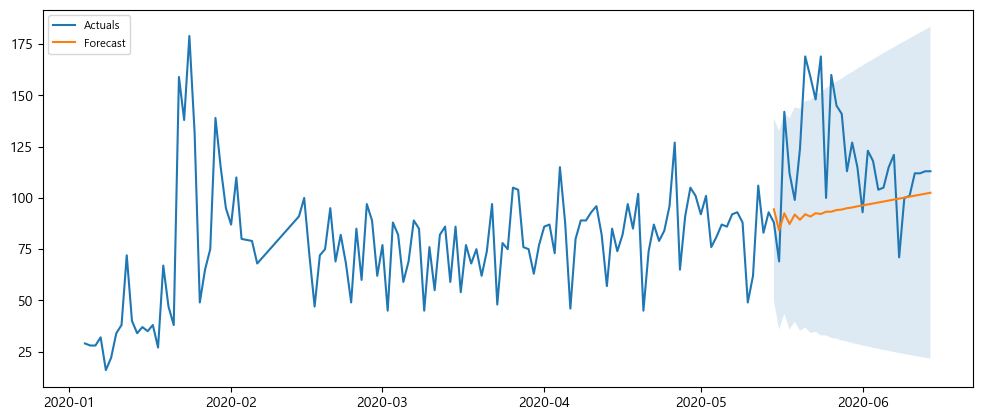

8.056156973741807


In [245]:
forcast_value(df2,'selng_cascnt_int')